## **PUNTO 1 EXAMEN FINAL HM_IA**

### **IMPORTACION DE LIBRERIAS Y TEXTO**

In [ ]:
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import re 
import matplotlib


url = "https://poestories.com/read/goldbug"
page = requests.get(url)

soup = BeautifulSoup(page.content, 'html.parser').text

busqueda_1  = re.search('\nThe Gold Bug\nby',soup)
busqueda_2 = re.search('--who shall tell?',soup)


limpieza = soup[busqueda_1.start():busqueda_2.end()]
print(limpieza)



The Gold Bug
by Edgar Allan Poe(published 1843)
  
Print Version

What ho! what ho! this fellow is dancing mad! 
He hath been bitten by the Tarantula. 
All in the Wrong.

MANY years ago, I contracted an intimacy with a Mr. William Legrand. He was of an ancient Huguenot family, and had once been wealthy; but a series of misfortunes had reduced him to want. To avoid the mortification consequent upon his disasters, he left New Orleans, the city of his forefathers, and took up his residence at Sullivan's Island, near Charleston, South Carolina. 

This Island is a very singular one. It consists of little else than the sea sand, and is about three miles long. Its breadth at no point exceeds a quarter of a mile. It is separated from the main land by a scarcely perceptible creek, oozing its way through a wilderness of reeds and slime, a favorite resort of the marsh-hen. The vegetation, as might be supposed, is scant, or at least dwarfish. No trees of any magnitude are to be seen. Near the wes

### **FUNCIONES**

In [ ]:
from requests.exceptions import RetryError
def codigo_por_remplar(letras_encontradas,codificacion_letras,codigo_remplazo):
  for i in range(len(letras_encontradas)):
    if i < 1:
      codigo_remplazado=re.sub(codificacion_letras[i],letras_encontradas[i],codigo_remplazo)
    else:
      codigo_remplazado=re.sub(codificacion_letras[i],letras_encontradas[i],codigo_remplazado)
  return codigo_remplazado

def posicion_encontrada(valor_encontrado,args,saltos):
  find_posicion = re.search(args,valor_encontrado)
  letra_encontrada = valor_encontrado[find_posicion.start()+saltos]
  return letra_encontrada

def remplazar_caracter_especial(codigo_por_filtrar,codificado,letra_remplazante):
  codigo_vectorizado = re.split('',codigo_por_filtrar)
  codigo_replaza_letra =""

  for i in range(len(codigo_vectorizado)):
    if codigo_vectorizado[i] == codificado:
      codigo_vectorizado[i] = letra_remplazante

  for i in codigo_vectorizado:
   codigo_replaza_letra += i + ''
  return codigo_replaza_letra

def creador_diccionario(texto):
    diccionario = {}
    for i in set(texto):
        diccionario[i] = texto.count(i)/len(texto)
    return diccionario

def filtra_word(valor):
  cadena_filtrada_palabra = []
  for i in range(len(cadena_palabras_bonita)):
    if re.findall(str([valor]),cadena_palabras_bonita[i]) != []:
      cadena_filtrada_palabra.append(cadena_palabras_bonita[i])

    return cadena_filtrada_palabra

### **LIMPIEZA DEL TEXTO**

In [ ]:
busqueda_codigo_1  = re.search('53‡',limpieza)
busqueda_codigo_2 = re.search('\n+NOTES',limpieza)


codigo= limpieza[busqueda_codigo_1.start():busqueda_codigo_2.start()]
contador_1=Counter(codigo)

diccionario = dict(contador_1)
print(codigo)

53‡‡†305))6*;4826)4‡.)4‡);80
6*;48†8¶60))85;1‡(;:‡*8†83(88)
5*†;46(;88*96*?;8)*‡(;485);5*†
2:*‡(;4956*2(5*-4)8¶8*;40692
85);)6†8)4‡‡;1(‡9;48081;8:8‡1
;48†85;4)485†528806*81(‡9;48
;(88;4(‡?34;48)4‡;161;:188;‡?;


### **CONTEO DE CARACTERES**

In [ ]:
df_diccionario = pd.DataFrame(diccionario, index = ['Frecuencia']) 
df_diccionario

5  3   ‡  †  0   )   6   *   ;   4  ...  2  .  \n  ¶  1   (  :  \
Frecuencia  12  4  16  8  6  16  11  13  26  19  ...  5  1   6  2  8  10  4   

            9  ?  -  
Frecuencia  5  3  1  

[1 rows x 21 columns]

### **DIAGRAMA DE FRECUENCIA VS CARACTERES DEL CODIGO**

<BarContainer object of 21 artists>

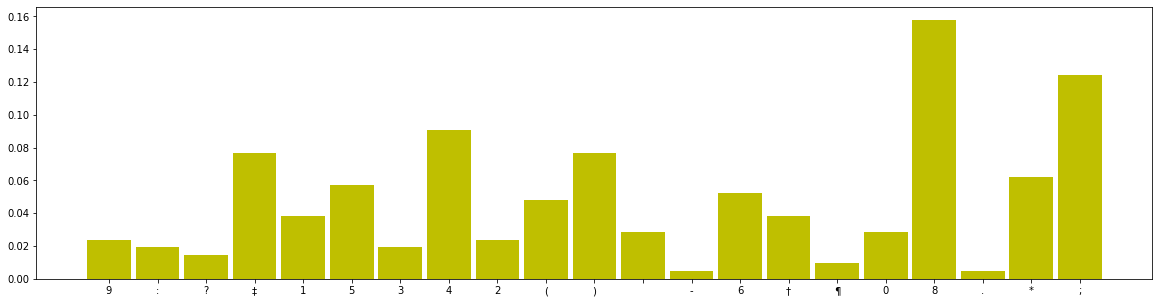

In [ ]:
test_dict = creador_diccionario(codigo)
plt.rcParams['figure.figsize'] = [20, 5]
plt.bar(test_dict.keys(), test_dict.values(), width=0.9, color='y')

### **CARACTERES MAS USADOS EN EL CODIGO**

In [ ]:
lista_diccionario_values = list(df_diccionario.values)
lista_diccionario = list(lista_diccionario_values[0])
diccionario_organizado = list(sorted(lista_diccionario_values[0], reverse= True))
simbolos_importantes = np.array(df_diccionario.columns[[lista_diccionario.index(diccionario_organizado[0]),lista_diccionario.index(diccionario_organizado[1]),lista_diccionario.index(diccionario_organizado[2])]])

print(simbolos_importantes)

['8' ';' '4']


### **IMPORTACION DE DATASET DE PALABRAS MAS USADAS EN EL IMGLES**

In [ ]:
import io
from google.colab import files
upload = files.upload()

Saving unigram_freq.csv to unigram_freq (1).csv


In [ ]:
lista_frecuencias = pd.read_csv(io.BytesIO(upload['unigram_freq.csv']))
lista_frecuencias

word        count
0           the  23135851162
1            of  13151942776
2           and  12997637966
3            to  12136980858
4             a   9081174698
...         ...          ...
333328    gooek        12711
333329   gooddg        12711
333330  gooblle        12711
333331   gollgo        12711
333332    golgw        12711

[333333 rows x 2 columns]

### **CREACION DE LISTA DE LETRAS CON MAYOR FRECUENCIA Y SU RESPECTIVO DIAGRAMA**

Text(0.5, 1.0, 'Most Common Letters')

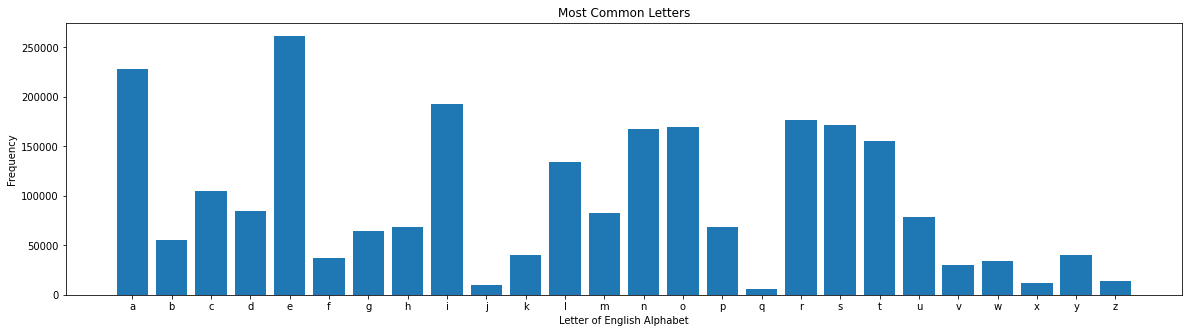

In [ ]:
lista_frecuencias['word'] = lista_frecuencias.word.astype('str')
letras_mayor_frecuencia = {}

for word in lista_frecuencias['word']:
    for letter in word:
        if letter in letras_mayor_frecuencia:
            letras_mayor_frecuencia[letter] += 1
        else:
            letras_mayor_frecuencia[letter] = 1


letras_organizadas = letras_mayor_frecuencia.items()
nuevos_valores = sorted(letras_organizadas)
df = pd.DataFrame(nuevos_valores, columns =['Letter', 'Number'])
plt.bar(x=df['Letter'], height=df['Number'])

plt.ylabel('Frequency')
plt.xlabel('Letter of English Alphabet')
plt.title('Most Common Letters')

### **OBTENCION DE LA LETRA MAS FRECUENTE EN TEXTO EN EL INGLES**

In [ ]:
valor_maximo1 = max((df['Number']))
lista_count1 = list(df['Number'])
letra_mas_usada = (df['Letter']).iloc[lista_count1.index(valor_maximo1)]
print(letra_mas_usada)

e


### **DIAGRAMA DE FRECUENCIA VS PALABRAS EN EL INGLES**

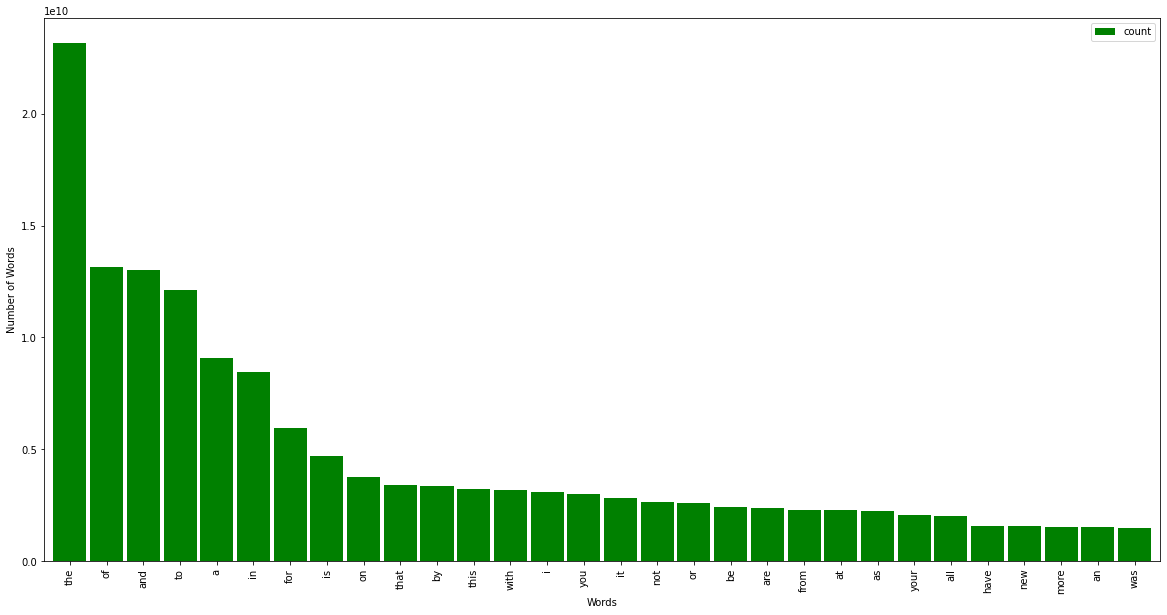

In [ ]:
plt.rcParams['figure.figsize']=[20,10]
(lista_frecuencias.iloc[0:30]).plot.bar(x='word',y='count',width=0.9, color='g')
plt.ylabel('Number of Words')
plt.xlabel('Words')
plt.title('');

### **OBTEBCION DE LAS LETRAS MAS FRECUENTES A PARTIR DE LA PALABRA MAS FRECUENTE**

In [ ]:
valor_maximo = max((lista_frecuencias['count']))
lista_count = list(lista_frecuencias['count'])
palabra_mas_usada = (lista_frecuencias['word']).iloc[lista_count.index(valor_maximo)]
validacion = np.array(re.split('',palabra_mas_usada))
lista_letras = list(df['Letter'])
lista_numeros = list(df['Number'])
concatenacion_mas_usadas = []
frecuenci_letras = []

for i in range(len(validacion)):
  for n in range(len(lista_letras)):
    if lista_letras[n] == validacion[i]:
      concatenacion_mas_usadas.append(df.iloc[lista_letras.index(lista_letras[n])])

data_amigable = pd.DataFrame(concatenacion_mas_usadas)
data_organizada = sorted(data_amigable['Number'],reverse = True)

for i in range(len(data_organizada)):
  frecuenci_letras.append((df['Letter']).iloc[lista_numeros.index(data_organizada[i])])

print(str([palabra_mas_usada]))
print(data_amigable)      
print(data_organizada)
print(frecuenci_letras)

['the']
   Letter  Number
19      t  155401
7       h   68622
4       e  261655
[261655, 155401, 68622]
['e', 't', 'h']


### **INICIO DE LA DECODIFICACION**

In [ ]:
cadena_letras_encontradas  = frecuenci_letras
cadena_codificacion_letras = simbolos_importantes
codigo_1_filtro = codigo_por_remplar(cadena_letras_encontradas,cadena_codificacion_letras,codigo)

print(cadena_letras_encontradas)
print(simbolos_importantes)

['e', 't', 'h']
['8' ';' '4']


In [ ]:
print(codigo_1_filtro)

53‡‡†305))6*the26)h‡.)h‡)te0
6*the†e¶60))e5t1‡(t:‡*e†e3(ee)
5*†th6(tee*96*?te)*‡(the5)t5*†
2:*‡(th956*2(5*-h)e¶e*th0692
e5)t)6†e)h‡‡t1(‡9the0e1te:e‡1
the†e5th)he5†52ee06*e1(‡9the
t(eeth(‡?3hthe)h‡t161t:1eet‡?t


In [ ]:
cadena_letras_encontradas = np.array(['a','d','g','i','o'])
cadena_codificacion_letras = np.array(['5','†','3','6','‡'])

codigo_2_filtro = codigo_por_remplar(cadena_letras_encontradas,cadena_codificacion_letras,codigo_1_filtro)
codigo_3_filtro = remplazar_caracter_especial(codigo_2_filtro,'*','n')
codigo_8_filtro = remplazar_caracter_especial(codigo_3_filtro,'(','r')


print(codigo_8_filtro)

agoodg0a))inthe2i)ho.)ho)te0
inthede¶i0))eat1ort:onedegree)
andthirteen9in?te)northea)tand
2:north9ain2ran-h)e¶enth0i92
ea)t)ide)hoot1ro9the0e1te:eo1
thedeath)heada2ee0ine1ro9the
treethro?ghthe)hot1i1t:1eeto?t


In [ ]:
lista_word = (lista_frecuencias.word.values).astype('str')
cadena_palabras_interes = []
cadena_palabras_bonita = []

for i in range(len(lista_word)):
  palabra_validar=(re.split('',str(lista_word[i])))[1:-1]
  if len(palabra_validar)==4:
    cadena_palabras_interes.append(palabra_validar)
    cadena_palabras_bonita.append(''.join(filter(None, palabra_validar)))

print(cadena_palabras_bonita)
print((np.asarray(cadena_palabras_bonita)).shape)

['that', 'this', 'with', 'from', 'your', 'have', 'more', 'will', 'home', 'page', 'free', 'time', 'they', 'site', 'what', 'news', 'only', 'when', 'here', 'also', 'help', 'view', 'been', 'were', 'some', 'like', 'than', 'find', 'date', 'back', 'list', 'name', 'just', 'over', 'year', 'into', 'next', 'used', 'work', 'last', 'most', 'data', 'make', 'them', 'post', 'city', 'such', 'best', 'then', 'good', 'well', 'info', 'high', 'each', 'very', 'book', 'read', 'need', 'many', 'user', 'said', 'does', 'mail', 'full', 'life', 'know', 'days', 'part', 'real', 'item', 'ebay', 'must', 'made', 'line', 'send', 'type', 'take', 'area', 'want', 'long', 'code', 'show', 'even', 'much', 'sign', 'file', 'link', 'open', 'case', 'same', 'both', 'game', 'care', 'down', 'size', 'shop', 'text', 'rate', 'form', 'love', 'john', 'main', 'call', 'save', 'york', 'card', 'jobs', 'food', 'sale', 'teen', 'room', 'join', 'west', 'look', 'left', 'team', 'week', 'note', 'live', 'june', 'plan', 'cost', 'july', 'test', 'come',

In [ ]:
cadena_filtrada_palabra = []
for i in range(len(cadena_palabras_bonita)):
  if re.findall(str(['theadginor']),cadena_palabras_bonita[i]) != []:
    cadena_filtrada_palabra.append(cadena_palabras_bonita[i])

print(cadena_filtrada_palabra)
print((np.asarray(cadena_filtrada_palabra)).shape)

['that', 'this', 'with', 'from', 'your', 'have', 'more', 'will', 'home', 'page', 'free', 'time', 'they', 'site', 'what', 'news', 'only', 'when', 'here', 'also', 'help', 'view', 'been', 'were', 'some', 'like', 'than', 'find', 'date', 'back', 'list', 'name', 'just', 'over', 'year', 'into', 'next', 'used', 'work', 'last', 'most', 'data', 'make', 'them', 'post', 'city', 'such', 'best', 'then', 'good', 'well', 'info', 'high', 'each', 'very', 'book', 'read', 'need', 'many', 'user', 'said', 'does', 'mail', 'life', 'know', 'days', 'part', 'real', 'item', 'ebay', 'must', 'made', 'line', 'send', 'type', 'take', 'area', 'want', 'long', 'code', 'show', 'even', 'much', 'sign', 'file', 'link', 'open', 'case', 'same', 'both', 'game', 'care', 'down', 'size', 'shop', 'text', 'rate', 'form', 'love', 'john', 'main', 'call', 'save', 'york', 'card', 'jobs', 'food', 'sale', 'teen', 'room', 'join', 'west', 'look', 'left', 'team', 'week', 'note', 'live', 'june', 'plan', 'cost', 'test', 'come', 'cart', 'play',

In [ ]:
total_letras_encontradas = np.array([*cadena_letras_encontradas, *frecuenci_letras])
print(total_letras_encontradas)

['a' 'd' 'g' 'i' 'o' 'e' 't' 'h']


In [ ]:
posibles_palabras = []
posibles_palabras_bonita = []
codigo = np.asarray((re.split('',codigo_8_filtro))[1:-1])
codi_array = [codigo for codigo in codigo if(re.search("\n", codigo) is None)]

for i in range(len(codi_array)):
  if i<len(codi_array)-4:
    for x in range(0,4):
      posibles_palabras.append(codi_array[i+x])
      if x==3:
        posibles_palabras_bonita.append(''.join(filter(None, posibles_palabras)))
  posibles_palabras = []

print(posibles_palabras_bonita)

['agoo', 'good', 'oodg', 'odg0', 'dg0a', 'g0a)', '0a))', 'a))i', '))in', ')int', 'inth', 'nthe', 'the2', 'he2i', 'e2i)', '2i)h', 'i)ho', ')ho.', 'ho.)', 'o.)h', '.)ho', ')ho)', 'ho)t', 'o)te', ')te0', 'te0i', 'e0in', '0int', 'inth', 'nthe', 'thed', 'hede', 'ede¶', 'de¶i', 'e¶i0', '¶i0)', 'i0))', '0))e', '))ea', ')eat', 'eat1', 'at1o', 't1or', '1ort', 'ort:', 'rt:o', 't:on', ':one', 'oned', 'nede', 'edeg', 'degr', 'egre', 'gree', 'ree)', 'ee)a', 'e)an', ')and', 'andt', 'ndth', 'dthi', 'thir', 'hirt', 'irte', 'rtee', 'teen', 'een9', 'en9i', 'n9in', '9in?', 'in?t', 'n?te', '?te)', 'te)n', 'e)no', ')nor', 'nort', 'orth', 'rthe', 'thea', 'hea)', 'ea)t', 'a)ta', ')tan', 'tand', 'and2', 'nd2:', 'd2:n', '2:no', ':nor', 'nort', 'orth', 'rth9', 'th9a', 'h9ai', '9ain', 'ain2', 'in2r', 'n2ra', '2ran', 'ran-', 'an-h', 'n-h)', '-h)e', 'h)e¶', ')e¶e', 'e¶en', '¶ent', 'enth', 'nth0', 'th0i', 'h0i9', '0i92', 'i92e', '92ea', '2ea)', 'ea)t', 'a)t)', ')t)i', 't)id', ')ide', 'ide)', 'de)h', 'e)ho', ')hoo',

In [ ]:
palabras_validadas=[]
count_fallos=0
for i in range(len(posibles_palabras_bonita)):
  palabra_estatica=(re.split('',str(posibles_palabras_bonita[i])))[1:-1]
  for x in range(len(cadena_filtrada_palabra)):
    palabra_variable=(re.split('',str(cadena_filtrada_palabra[x])))[1:-1]
    for z in range(0,4):
      if palabra_estatica[z] != palabra_variable[z]:
        count_fallos+=1
    if count_fallos==1:
      palabras_validadas.append([''.join(filter(None, palabra_variable)),''.join(filter(None, palabra_estatica))])
      count_fallos=0
    else:
      count_fallos=0

print(palabras_validadas)

[['agro', 'agoo'], ['agoa', 'agoo'], ['agco', 'agoo'], ['agon', 'agoo'], ['ahoo', 'agoo'], ['agio', 'agoo'], ['agor', 'agoo'], ['agog', 'agoo'], ['agos', 'agoo'], ['aloo', 'agoo'], ['agno', 'agoo'], ['aboo', 'agoo'], ['agso', 'agoo'], ['food', 'good'], ['gold', 'good'], ['wood', 'good'], ['mood', 'good'], ['hood', 'good'], ['goog', 'good'], ['goon', 'good'], ['goof', 'good'], ['gord', 'good'], ['rood', 'good'], ['goed', 'good'], ['goad', 'good'], ['dood', 'good'], ['goos', 'good'], ['gook', 'good'], ['goid', 'good'], ['sood', 'good'], ['goop', 'good'], ['goom', 'good'], ['gnod', 'good'], ['nood', 'good'], ['gool', 'good'], ['goud', 'good'], ['kood', 'good'], ['goot', 'good'], ['godd', 'good'], ['gmod', 'good'], ['bood', 'good'], ['goor', 'good'], ['lood', 'good'], ['glod', 'good'], ['gomd', 'good'], ['geod', 'good'], ['cood', 'good'], ['gpod', 'good'], ['goob', 'good'], ['dodg', 'oodg'], ['oods', 'oodg'], ['oodb', 'oodg'], ['ooda', 'oodg'], ['lodg', 'oodg'], ['odge', 'odg0'], ['odgs', 

In [ ]:
indedx_codigo = np.asarray(palabras_validadas)
primero = list(indedx_codigo[:,1])
conteo = Counter(indedx_codigo[:,1])

simbolo_menos_repetido = (list(conteo.most_common())[-1])[0]
simbolo_cadena = (re.split('',simbolo_menos_repetido))[1:-1]

palabra_menos_repetido = (indedx_codigo[primero.index(simbolo_menos_repetido),:])[0] 
letra_cadena = (re.split('',palabra_menos_repetido))[1:-1]

print(conteo)

Counter({'nort': 84, 'thed': 76, 'hede': 76, 'nthe': 66, 'inth': 52, '9the': 52, 'deat': 50, 'tand': 45, 'tree': 43, 'teen': 42, 'reet': 42, 'thet': 40, 'nede': 39, 'andt': 39, 'hoot': 38, 'eada': 38, 'thea': 37, 'good': 36, 'gree': 36, 'orth': 34, 'rthe': 30, 'edea': 30, 'hirt': 29, 'head': 29, 'hthe': 27, 'the2': 26, ')and': 26, 'and2': 26, 'the0': 26, '1the': 26, 'the)': 26, 'oned': 25, 'thir': 25, 'etre': 25, 'eath': 24, 'e0in': 22, '0ine': 21, ')int': 20, '0int': 20, ':one': 20, 'degr': 20, 'enth': 20, ')ide': 20, 'egre': 19, 'a)ta': 19, '9ain': 19, '¶ent': 19, 'hetr': 19, 'eeth': 19, 'eeto': 19, 'irte': 18, 'da2e': 18, ')eat': 17, '1ort': 17, 'n2ra': 17, 'ide)': 17, 'ada2': 17, '1eet': 17, 'ro9t': 16, 'he0e': 16, 'edeg': 15, 'de¶i': 14, 'rtee': 14, '2ran': 14, 'e¶en': 14, 'thro': 14, 'hot1': 14, 'agoo': 13, 'e)an': 13, 'ethr': 13, 'ede¶': 12, 'ine1': 12, 'ree)': 11, 'ran-': 11, 'te:e': 11, 'ghth': 11, 'hea)': 10, 'a2ee': 10, 'e1ro': 10, 'eto?': 10, 'te0i': 9, 'in?t': 9, 'te)n': 9

In [ ]:
print(simbolo_menos_repetido)
print(palabra_menos_repetido)
print(simbolo_cadena)
print(letra_cadena)

o?gh
ough
['o', '?', 'g', 'h']
['o', 'u', 'g', 'h']


In [ ]:
encuentro_letra = []
encuentro_simbolo = []
for i in range(len(palabra_menos_repetido)):
  if simbolo_cadena[i]!= letra_cadena[i]:
    encuentro_letra.append(letra_cadena[i])
    encuentro_simbolo.append(simbolo_cadena[i])

print(encuentro_letra[0])
print(encuentro_simbolo[0])

u
?


In [ ]:
codigo_9_filtro = remplazar_caracter_especial(codigo_8_filtro,encuentro_simbolo[0],encuentro_letra[0])

print(codigo_9_filtro)

agoodg0a))inthe2i)ho.)ho)te0
inthede¶i0))eat1ort:onedegree)
andthirteen9inute)northea)tand
2:north9ain2ran-h)e¶enth0i92
ea)t)ide)hoot1ro9the0e1te:eo1
thedeath)heada2ee0ine1ro9the
treethroughthe)hot1i1t:1eetout


In [ ]:
total_letras_encontradas = np.array([*total_letras_encontradas,encuentro_letra[0],'z','w','x','q','k','j','r','n'])
print(total_letras_encontradas)

['a' 'd' 'g' 'i' 'o' 'e' 't' 'h' 'u' 'z' 'w' 'x' 'q' 'k' 'j' 'r' 'n']


In [ ]:
cadena_filtrada_palabra = []
for i in range(len(cadena_palabras_bonita)):
  if re.findall(str(['theadginoru']),cadena_palabras_bonita[i]) != []:
    cadena_filtrada_palabra.append(cadena_palabras_bonita[i])

print(cadena_filtrada_palabra)
print((np.asarray(cadena_filtrada_palabra)).shape)

['that', 'this', 'with', 'from', 'your', 'have', 'more', 'will', 'home', 'page', 'free', 'time', 'they', 'site', 'what', 'news', 'only', 'when', 'here', 'also', 'help', 'view', 'been', 'were', 'some', 'like', 'than', 'find', 'date', 'back', 'list', 'name', 'just', 'over', 'year', 'into', 'next', 'used', 'work', 'last', 'most', 'data', 'make', 'them', 'post', 'city', 'such', 'best', 'then', 'good', 'well', 'info', 'high', 'each', 'very', 'book', 'read', 'need', 'many', 'user', 'said', 'does', 'mail', 'full', 'life', 'know', 'days', 'part', 'real', 'item', 'ebay', 'must', 'made', 'line', 'send', 'type', 'take', 'area', 'want', 'long', 'code', 'show', 'even', 'much', 'sign', 'file', 'link', 'open', 'case', 'same', 'both', 'game', 'care', 'down', 'size', 'shop', 'text', 'rate', 'form', 'love', 'john', 'main', 'call', 'save', 'york', 'card', 'jobs', 'food', 'sale', 'teen', 'room', 'join', 'west', 'look', 'left', 'team', 'week', 'note', 'live', 'june', 'plan', 'cost', 'july', 'test', 'come',

In [ ]:
count_aciertos=0
lista_filtrada_codigo = [] 
for i in range(len(cadena_filtrada_palabra)):
  palabra_estatica=(re.split('',str(cadena_filtrada_palabra[i])))[1:-1]
  for x in range(len(palabra_estatica)):
    for z in range(len(total_letras_encontradas)):
      if palabra_estatica[x]== total_letras_encontradas[z]:
        count_aciertos+=1
  if count_aciertos != len(palabra_estatica):
    lista_filtrada_codigo.append(''.join(filter(None, palabra_estatica)))
    count_aciertos=0
  else:
    count_aciertos=0
print(np.asarray(lista_filtrada_codigo).shape)

(24796,)


In [ ]:
posibles_palabras = []
posibles_palabras_bonita = []
codigo = np.asarray((re.split('',codigo_9_filtro))[1:-1])
codi_array = [codigo for codigo in codigo if(re.search("\n", codigo) is None)]

for i in range(len(codi_array)):
  if i<len(codi_array)-4:
    for x in range(0,4):
      posibles_palabras.append(codi_array[i+x])
      if x==3:
        posibles_palabras_bonita.append(''.join(filter(None, posibles_palabras)))
  posibles_palabras = []

print(posibles_palabras_bonita)

['agoo', 'good', 'oodg', 'odg0', 'dg0a', 'g0a)', '0a))', 'a))i', '))in', ')int', 'inth', 'nthe', 'the2', 'he2i', 'e2i)', '2i)h', 'i)ho', ')ho.', 'ho.)', 'o.)h', '.)ho', ')ho)', 'ho)t', 'o)te', ')te0', 'te0i', 'e0in', '0int', 'inth', 'nthe', 'thed', 'hede', 'ede¶', 'de¶i', 'e¶i0', '¶i0)', 'i0))', '0))e', '))ea', ')eat', 'eat1', 'at1o', 't1or', '1ort', 'ort:', 'rt:o', 't:on', ':one', 'oned', 'nede', 'edeg', 'degr', 'egre', 'gree', 'ree)', 'ee)a', 'e)an', ')and', 'andt', 'ndth', 'dthi', 'thir', 'hirt', 'irte', 'rtee', 'teen', 'een9', 'en9i', 'n9in', '9inu', 'inut', 'nute', 'ute)', 'te)n', 'e)no', ')nor', 'nort', 'orth', 'rthe', 'thea', 'hea)', 'ea)t', 'a)ta', ')tan', 'tand', 'and2', 'nd2:', 'd2:n', '2:no', ':nor', 'nort', 'orth', 'rth9', 'th9a', 'h9ai', '9ain', 'ain2', 'in2r', 'n2ra', '2ran', 'ran-', 'an-h', 'n-h)', '-h)e', 'h)e¶', ')e¶e', 'e¶en', '¶ent', 'enth', 'nth0', 'th0i', 'h0i9', '0i92', 'i92e', '92ea', '2ea)', 'ea)t', 'a)t)', ')t)i', 't)id', ')ide', 'ide)', 'de)h', 'e)ho', ')hoo',

In [ ]:
palabras_validadas=[]
count_fallos=0
for i in range(len(posibles_palabras_bonita)):
  palabra_estatica=(re.split('',str(posibles_palabras_bonita[i])))[1:-1]
  for x in range(len(lista_filtrada_codigo)):
    palabra_variable=(re.split('',str(lista_filtrada_codigo[x])))[1:-1]
    for z in range(0,4):
      if palabra_estatica[z] != palabra_variable[z]:
        count_fallos+=1
    if count_fallos==1:
      palabras_validadas.append([''.join(filter(None, palabra_variable)),''.join(filter(None, palabra_estatica))])
      count_fallos=0
    else:
      count_fallos=0

print(palabras_validadas)

[['agco', 'agoo'], ['agos', 'agoo'], ['aloo', 'agoo'], ['aboo', 'agoo'], ['agso', 'agoo'], ['food', 'good'], ['gold', 'good'], ['mood', 'good'], ['goof', 'good'], ['goos', 'good'], ['sood', 'good'], ['goop', 'good'], ['goom', 'good'], ['gool', 'good'], ['gmod', 'good'], ['bood', 'good'], ['lood', 'good'], ['glod', 'good'], ['gomd', 'good'], ['cood', 'good'], ['gpod', 'good'], ['goob', 'good'], ['oods', 'oodg'], ['oodb', 'oodg'], ['lodg', 'oodg'], ['odgs', 'odg0'], ['dgca', 'dg0a'], ['mint', ')int'], ['pint', ')int'], ['lint', ')int'], ['sint', ')int'], ['vint', ')int'], ['cint', ')int'], ['bint', ')int'], ['fint', ')int'], ['inch', 'inth'], ['intl', 'inth'], ['ints', 'inth'], ['intc', 'inth'], ['intv', 'inth'], ['intf', 'inth'], ['intp', 'inth'], ['mnth', 'inth'], ['ivth', 'inth'], ['intb', 'inth'], ['isth', 'inth'], ['fthe', 'nthe'], ['sthe', 'nthe'], ['cthe', 'nthe'], ['ythe', 'nthe'], ['mthe', 'nthe'], ['lthe', 'nthe'], ['bthe', 'nthe'], ['vthe', 'nthe'], ['pthe', 'nthe'], ['nche', 

In [ ]:
indedx_codigo = np.asarray(palabras_validadas)
primero = list(indedx_codigo[:,1])
segun = list(indedx_codigo[:,0])
conteo = Counter(indedx_codigo[:,1])

simbolo_menos_repetido = (list(conteo.most_common())[-1])[0]
simbolo_cadena = (re.split('',simbolo_menos_repetido))[1:-1]

palabra_menos_repetido = (indedx_codigo[primero.index(simbolo_menos_repetido),:])[0] 
letra_cadena = (re.split('',palabra_menos_repetido))[1:-1]

print(conteo)
print(palabras_validadas)

Counter({'nort': 36, 'hede': 34, 'thed': 30, 'deat': 26, 'inth': 22, 'nthe': 22, 'reet': 19, '9the': 18, 'good': 17, 'nede': 17, 'gree': 17, 'nute': 17, 'eada': 17, 'thet': 17, 'hoot': 16, 'tree': 16, 'tand': 14, 'andt': 13, 'teen': 13, 'edea': 13, 'head': 13, 'thea': 12, 'eeto': 12, 'hirt': 11, 'eath': 11, 'inut': 10, 'rthe': 10, 'the2': 9, 'oned': 9, ')and': 9, 'and2': 9, 'the0': 9, '1the': 9, 'etre': 9, 'hthe': 9, 'the)': 9, ')int': 8, 'e0in': 8, '0int': 8, ')eat': 8, '1ort': 8, ':one': 8, 'a)ta': 8, '9ain': 8, 'n2ra': 8, '¶ent': 8, ')ide': 8, 'ro9t': 8, 'ada2': 8, 'da2e': 8, '0ine': 8, '1eet': 8, 'etou': 8, 'de¶i': 7, 'edeg': 7, 'rtee': 7, 'e¶en': 7, 'enth': 7, 'ide)': 7, 'eeth': 7, 'roug': 7, 'ede¶': 6, 'degr': 6, 'ree)': 6, 'e)an': 6, 'thir': 6, 'irte': 6, 'orth': 6, 'he0e': 6, 'te:e': 6, 'a2ee': 6, 'agoo': 5, 'egre': 5, 'hot1': 5, '9inu': 4, 'hea)': 4, 'ea)t': 4, '2ran': 4, ')hoo': 4, 'ine1': 4, 'e1ro': 4, 'hetr': 4, 'ethr': 4, 'thro': 4, 'oodg': 3, 'he2i': 3, 'ho)t': 3, 'te0i':

In [ ]:
print(simbolo_menos_repetido)
print(palabra_menos_repetido)
print(simbolo_cadena)
print(letra_cadena)

he)h
hesh
['h', 'e', ')', 'h']
['h', 'e', 's', 'h']


In [ ]:
encuentro_letra = []
encuentro_simbolo = []
for i in range(len(palabra_menos_repetido)):
  if simbolo_cadena[i]!= letra_cadena[i]:
    encuentro_letra.append(letra_cadena[i])
    encuentro_simbolo.append(simbolo_cadena[i])

print(encuentro_letra[0])
print(encuentro_simbolo[0])

s
)


In [ ]:
codigo_10_filtro = remplazar_caracter_especial(codigo_9_filtro,encuentro_simbolo[0],encuentro_letra[0])

print(codigo_10_filtro)

agoodg0assinthe2isho.shoste0
inthede¶i0sseat1ort:onedegrees
andthirteen9inutesnortheastand
2:north9ain2ran-hse¶enth0i92
eastsideshoot1ro9the0e1te:eo1
thedeathsheada2ee0ine1ro9the
treethroughtheshot1i1t:1eetout


In [ ]:
total_letras_encontradas = np.array([*total_letras_encontradas,encuentro_letra[0]])
print(total_letras_encontradas)

['a' 'd' 'g' 'i' 'o' 'e' 't' 'h' 'u' 'z' 'w' 'x' 'q' 'k' 'j' 'r' 'n' 's']


In [ ]:
cadena_palabras_interes = []
cadena_palabras_bonita = []

for i in range(len(lista_word)):
  palabra_validar=(re.split('',str(lista_word[i])))[1:-1]
  if len(palabra_validar)==5:
    cadena_palabras_interes.append(palabra_validar)
    cadena_palabras_bonita.append(''.join(filter(None, palabra_validar)))

In [ ]:
cadena_filtrada_palabra = []
for i in range(len(cadena_palabras_bonita)):
  if re.findall(str(['theadginorus']),cadena_palabras_bonita[i]) != []:
    cadena_filtrada_palabra.append(cadena_palabras_bonita[i])

print(cadena_filtrada_palabra)
print((np.asarray(cadena_filtrada_palabra)).shape)
print(cadena_filtrada_palabra.count('name'))

['about', 'other', 'which', 'their', 'there', 'first', 'would', 'these', 'click', 'price', 'state', 'email', 'world', 'music', 'after', 'video', 'where', 'books', 'links', 'years', 'order', 'items', 'group', 'under', 'games', 'could', 'great', 'hotel', 'store', 'terms', 'right', 'local', 'those', 'using', 'phone', 'forum', 'based', 'black', 'check', 'index', 'being', 'women', 'today', 'south', 'pages', 'found', 'house', 'photo', 'power', 'while', 'three', 'total', 'place', 'think', 'north', 'posts', 'media', 'water', 'since', 'guide', 'board', 'white', 'small', 'times', 'sites', 'level', 'hours', 'image', 'title', 'shall', 'class', 'still', 'money', 'every', 'visit', 'tools', 'reply', 'value', 'press', 'learn', 'print', 'stock', 'point', 'sales', 'large', 'table', 'start', 'model', 'human', 'movie', 'march', 'yahoo', 'going', 'study', 'staff', 'again', 'april', 'never', 'users', 'topic', 'below', 'party', 'login', 'legal', 'above', 'quote', 'story', 'rates', 'young', 'field', 'paper', 

In [ ]:
lista_filtrada_codigo = [] 
for i in range(len(cadena_filtrada_palabra)):
  palabra_estatica=(re.split('',str(cadena_filtrada_palabra[i])))[1:-1]
  for x in range(len(palabra_estatica)):
    for z in range(len(total_letras_encontradas)):
      if palabra_estatica[x]== total_letras_encontradas[z]:
        count_aciertos+=1
  if count_aciertos != len(palabra_estatica):
    lista_filtrada_codigo.append(''.join(filter(None, palabra_estatica)))
    count_aciertos=0
  else:
    count_aciertos=0
print(np.asarray(lista_filtrada_codigo).shape)

(29603,)


In [ ]:
posibles_palabras = []
posibles_palabras_bonita = []
codigo = np.asarray((re.split('',codigo_10_filtro))[1:-1])
codi_array = [codigo for codigo in codigo if(re.search("\n", codigo) is None)]

for i in range(len(codi_array)):
  if i<len(codi_array)-5:
    for x in range(0,5):
      posibles_palabras.append(codi_array[i+x])
      if x==4:
        posibles_palabras_bonita.append(''.join(filter(None, posibles_palabras)))
  posibles_palabras = []

print(posibles_palabras_bonita)

['agood', 'goodg', 'oodg0', 'odg0a', 'dg0as', 'g0ass', '0assi', 'assin', 'ssint', 'sinth', 'inthe', 'nthe2', 'the2i', 'he2is', 'e2ish', '2isho', 'isho.', 'sho.s', 'ho.sh', 'o.sho', '.shos', 'shost', 'hoste', 'oste0', 'ste0i', 'te0in', 'e0int', '0inth', 'inthe', 'nthed', 'thede', 'hede¶', 'ede¶i', 'de¶i0', 'e¶i0s', '¶i0ss', 'i0sse', '0ssea', 'sseat', 'seat1', 'eat1o', 'at1or', 't1ort', '1ort:', 'ort:o', 'rt:on', 't:one', ':oned', 'onede', 'nedeg', 'edegr', 'degre', 'egree', 'grees', 'reesa', 'eesan', 'esand', 'sandt', 'andth', 'ndthi', 'dthir', 'thirt', 'hirte', 'irtee', 'rteen', 'teen9', 'een9i', 'en9in', 'n9inu', '9inut', 'inute', 'nutes', 'utesn', 'tesno', 'esnor', 'snort', 'north', 'orthe', 'rthea', 'theas', 'heast', 'easta', 'astan', 'stand', 'tand2', 'and2:', 'nd2:n', 'd2:no', '2:nor', ':nort', 'north', 'orth9', 'rth9a', 'th9ai', 'h9ain', '9ain2', 'ain2r', 'in2ra', 'n2ran', '2ran-', 'ran-h', 'an-hs', 'n-hse', '-hse¶', 'hse¶e', 'se¶en', 'e¶ent', '¶enth', 'enth0', 'nth0i', 'th0i9', 

In [ ]:
lista_filtrada_codigo_simbolo = [] 
for i in range(len(posibles_palabras_bonita)):
  palabra_estatica=(re.split('',str(posibles_palabras_bonita[i])))[1:-1]
  for x in range(len(palabra_estatica)):
    for z in range(len(total_letras_encontradas)):
      if palabra_estatica[x]== total_letras_encontradas[z]:
        count_aciertos+=1
  if count_aciertos != len(palabra_estatica):
    lista_filtrada_codigo_simbolo.append(''.join(filter(None, palabra_estatica)))
    count_aciertos=0
  else:
    count_aciertos=0
print(np.asarray(lista_filtrada_codigo_simbolo).shape)

(117,)


In [ ]:
palabras_validadas=[]
count_fallos=0
for i in range(len(lista_filtrada_codigo_simbolo)):
  palabra_estatica=(re.split('',str(lista_filtrada_codigo_simbolo[i])))[1:-1]
  for x in range(len(lista_filtrada_codigo)):
    palabra_variable=(re.split('',str(lista_filtrada_codigo[x])))[1:-1]
    for z in range(0,4):
      if palabra_estatica[z] != palabra_variable[z]:
        count_fallos+=1
    if count_fallos==1:
      palabras_validadas.append([''.join(filter(None, palabra_variable)),''.join(filter(None, palabra_estatica))])
      count_fallos=0
    else:
      count_fallos=0

print(palabras_validadas)

[['lodge', 'oodg0'], ['dodgy', 'oodg0'], ['oodle', 'oodg0'], ['podge', 'oodg0'], ['bodge', 'oodg0'], ['oolge', 'oodg0'], ['ooogl', 'oodg0'], ['ooagl', 'oodg0'], ['ooogp', 'oodg0'], ['ooigl', 'oodg0'], ['oolgr', 'oodg0'], ['dgram', 'dg0as'], ['dglap', 'dg0as'], ['glass', 'g0ass'], ['grasp', 'g0ass'], ['gsasl', 'g0ass'], ['glast', 'g0ass'], ['gpass', 'g0ass'], ['gaasp', 'g0ass'], ['sassy', '0assi'], ['massa', '0assi'], ['lasso', '0assi'], ['passe', '0assi'], ['masse', '0assi'], ['basso', '0assi'], ['basse', '0assi'], ['passo', '0assi'], ['lasse', '0assi'], ['bassi', '0assi'], ['casse', '0assi'], ['fassa', '0assi'], ['massy', '0assi'], ['cassa', '0assi'], ['hassy', '0assi'], ['bassa', '0assi'], ['cassy', '0assi'], ['passa', '0assi'], ['passy', '0assi'], ['passi', '0assi'], ['lassi', '0assi'], ['gassy', '0assi'], ['lassa', '0assi'], ['passu', '0assi'], ['bassy', '0assi'], ['massi', '0assi'], ['vasse', '0assi'], ['cassi', '0assi'], ['passw', '0assi'], ['nassp', '0assi'], ['massu', '0assi'],

In [ ]:
indedx_codigo = np.asarray(palabras_validadas)
primero = list(indedx_codigo[:,1])
segun = list(indedx_codigo[:,0])
conteo = Counter(indedx_codigo[:,1])

simbolo_menos_repetido = (list(conteo.most_common())[-2])[0]
simbolo_cadena = (re.split('',simbolo_menos_repetido))[1:-1]

palabra_menos_repetido = (indedx_codigo[primero.index(simbolo_menos_repetido),:])[0] 
letra_cadena = (re.split('',palabra_menos_repetido))[1:-1]

print(conteo)
print(palabras_validadas)

Counter({'tand2': 65, 'hede¶': 56, 'seat1': 49, 'hoot1': 48, '0ine1': 44, 'shot1': 42, '0assi': 41, 'oste0': 38, 'da2ee': 38, ':oned': 36, '¶enth': 36, 'eada2': 35, '2ran-': 34, '1ort:': 32, 'de¶i0': 30, 'ste0i': 29, '9ain2': 27, 'sho.s': 25, 'se¶en': 24, '0inth': 20, 'teen9': 20, 'te:eo': 18, 'he0e1': 17, 'the2i': 16, 'the0e': 16, 'hot1i': 16, 'ran-h': 15, '2east': 15, 'e1ro9': 15, 'e1te:': 14, 'ada2e': 14, 'a2ee0': 14, '1eeto': 14, 'he2is': 13, 'isho.': 13, 'e0int': 13, 'en9in': 13, 'e0ine': 13, '2isho': 12, 'te0in': 12, 'oodg0': 11, '9inut': 11, 'e¶ent': 11, 'ro9th': 10, 'and2:': 9, 'e2ish': 8, '.shos': 8, '0ssea': 8, 'in2ra': 8, 'enth0': 8, 't1ro9': 7, 'g0ass': 6, 'nthe2': 6, 'at1or': 6, 'orth9': 6, 'n2ran': 6, 'oot1r': 6, 'ne1ro': 5, 'ho.sh': 4, 'ede¶i': 4, 'n9inu': 4, ':nort': 4, 'an-hs': 4, 'ort:o': 3, 'ine1r': 3, 'dg0as': 2, 't1ort': 2, 't:one': 2, 'th9ai': 2, 'ain2r': 2, 'th0i9': 2, 'o9the': 2, '9the0': 2, 'e:eo1': 2, '1thed': 2, '9thet': 2, 'i0sse': 1, 'eat1o': 1, 'h9ain': 1,

In [ ]:
print(simbolo_menos_repetido)
print(palabra_menos_repetido)
print(simbolo_cadena)
print(letra_cadena)

o1the
ofthe
['o', '1', 't', 'h', 'e']
['o', 'f', 't', 'h', 'e']


In [ ]:
encuentro_letra = []
encuentro_simbolo = []
for i in range(len(palabra_menos_repetido)):
  if simbolo_cadena[i]!= letra_cadena[i]:
    encuentro_letra.append(letra_cadena[i])
    encuentro_simbolo.append(simbolo_cadena[i])

print(encuentro_letra[0])
print(encuentro_simbolo[0])

f
1


In [ ]:
codigo_11_filtro = remplazar_caracter_especial(codigo_10_filtro,encuentro_simbolo[0],encuentro_letra[0])

print(codigo_11_filtro)

agoodg0assinthe2isho.shoste0
inthede¶i0sseatfort:onedegrees
andthirteen9inutesnortheastand
2:north9ain2ran-hse¶enth0i92
eastsideshootfro9the0efte:eof
thedeathsheada2ee0inefro9the
treethroughtheshotfift:feetout


In [ ]:
total_letras_encontradas = np.array([*total_letras_encontradas,encuentro_letra[0]])
print(total_letras_encontradas)

['a' 'd' 'g' 'i' 'o' 'e' 't' 'h' 'u' 'z' 'w' 'x' 'q' 'k' 'j' 'r' 'n' 's'
 'f']


In [ ]:
cadena_palabras_interes = []
cadena_palabras_bonita = []

for i in range(len(lista_word)):
  palabra_validar=(re.split('',str(lista_word[i])))[1:-1]
  if len(palabra_validar)==6:
    cadena_palabras_interes.append(palabra_validar)
    cadena_palabras_bonita.append(''.join(filter(None, palabra_validar)))

In [ ]:
cadena_filtrada_palabra = []
for i in range(len(cadena_palabras_bonita)):
  if re.findall(str(['theadginorusf']),cadena_palabras_bonita[i]) != []:
    cadena_filtrada_palabra.append(cadena_palabras_bonita[i])

print(cadena_filtrada_palabra)
print((np.asarray(cadena_filtrada_palabra)).shape)
print(cadena_filtrada_palabra.count('name'))

['search', 'online', 'people', 'health', 'should', 'system', 'policy', 'number', 'please', 'rights', 'public', 'school', 'review', 'united', 'center', 'travel', 'report', 'member', 'before', 'hotels', 'office', 'design', 'posted', 'within', 'states', 'family', 'prices', 'sports', 'county', 'access', 'change', 'rating', 'during', 'return', 'events', 'little', 'movies', 'source', 'author', 'around', 'course', 'canada', 'credit', 'estate', 'select', 'photos', 'thread', 'market', 'really', 'action', 'series', 'second', 'forums', 'better', 'friend', 'server', 'issues', 'street', 'things', 'person', 'mobile', 'offers', 'recent', 'stores', 'memory', 'social', 'august', 'create', 'single', 'latest', 'status', 'browse', 'seller', 'always', 'result', 'groups', 'making', 'future', 'london', 'become', 'garden', 'listed', 'energy', 'images', 'notice', 'others', 'format', 'months', 'safety', 'having', 'common', 'living', 'called', 'period', 'window', 'france', 'region', 'island', 'record', 'direct',

In [ ]:
lista_filtrada_codigo = [] 
for i in range(len(cadena_filtrada_palabra)):
  palabra_estatica=(re.split('',str(cadena_filtrada_palabra[i])))[1:-1]
  for x in range(len(palabra_estatica)):
    for z in range(len(total_letras_encontradas)):
      if palabra_estatica[x]== total_letras_encontradas[z]:
        count_aciertos+=1
  if count_aciertos != len(palabra_estatica):
    lista_filtrada_codigo.append(''.join(filter(None, palabra_estatica)))
    count_aciertos=0
  else:
    count_aciertos=0
print(np.asarray(lista_filtrada_codigo).shape)

(37552,)


In [ ]:
posibles_palabras = []
posibles_palabras_bonita = []
codigo = np.asarray((re.split('',codigo_11_filtro))[1:-1])
codi_array = [codigo for codigo in codigo if(re.search("\n", codigo) is None)]

for i in range(len(codi_array)):
  if i<len(codi_array)-6:
    for x in range(0,6):
      posibles_palabras.append(codi_array[i+x])
      if x==5:
        posibles_palabras_bonita.append(''.join(filter(None, posibles_palabras)))
  posibles_palabras = []

print(posibles_palabras_bonita)

['agoodg', 'goodg0', 'oodg0a', 'odg0as', 'dg0ass', 'g0assi', '0assin', 'assint', 'ssinth', 'sinthe', 'inthe2', 'nthe2i', 'the2is', 'he2ish', 'e2isho', '2isho.', 'isho.s', 'sho.sh', 'ho.sho', 'o.shos', '.shost', 'shoste', 'hoste0', 'oste0i', 'ste0in', 'te0int', 'e0inth', '0inthe', 'inthed', 'nthede', 'thede¶', 'hede¶i', 'ede¶i0', 'de¶i0s', 'e¶i0ss', '¶i0sse', 'i0ssea', '0sseat', 'sseatf', 'seatfo', 'eatfor', 'atfort', 'tfort:', 'fort:o', 'ort:on', 'rt:one', 't:oned', ':onede', 'onedeg', 'nedegr', 'edegre', 'degree', 'egrees', 'greesa', 'reesan', 'eesand', 'esandt', 'sandth', 'andthi', 'ndthir', 'dthirt', 'thirte', 'hirtee', 'irteen', 'rteen9', 'teen9i', 'een9in', 'en9inu', 'n9inut', '9inute', 'inutes', 'nutesn', 'utesno', 'tesnor', 'esnort', 'snorth', 'northe', 'orthea', 'rtheas', 'theast', 'heasta', 'eastan', 'astand', 'stand2', 'tand2:', 'and2:n', 'nd2:no', 'd2:nor', '2:nort', ':north', 'north9', 'orth9a', 'rth9ai', 'th9ain', 'h9ain2', '9ain2r', 'ain2ra', 'in2ran', 'n2ran-', '2ran-h',

In [ ]:
count_aciertos=0
lista_filtrada_codigo_simbolo = [] 
for i in range(len(posibles_palabras_bonita)):
  palabra_estatica=(re.split('',str(posibles_palabras_bonita[i])))[1:-1]
  for x in range(len(palabra_estatica)):
    for z in range(len(total_letras_encontradas)):
      if palabra_estatica[x]== total_letras_encontradas[z]:
        count_aciertos+=1
  if count_aciertos != len(palabra_estatica):
    lista_filtrada_codigo_simbolo.append(''.join(filter(None, palabra_estatica)))
    count_aciertos=0
  else:
    count_aciertos=0
print(np.asarray(lista_filtrada_codigo_simbolo).shape)

(112,)


In [ ]:
palabras_validadas=[]
count_fallos=0
for i in range(len(lista_filtrada_codigo_simbolo)):
  palabra_estatica=(re.split('',str(lista_filtrada_codigo_simbolo[i])))[1:-1]
  for x in range(len(lista_filtrada_codigo)):
    palabra_variable=(re.split('',str(lista_filtrada_codigo[x])))[1:-1]
    for z in range(0,4):
      if palabra_estatica[z] != palabra_variable[z]:
        count_fallos+=1
    if count_fallos==1:
      palabras_validadas.append([''.join(filter(None, palabra_variable)),''.join(filter(None, palabra_estatica))])
      count_fallos=0
    else:
      count_fallos=0

print(palabras_validadas)

[['google', 'goodg0'], ['golden', 'goodg0'], ['voodoo', 'goodg0'], ['noodle', 'goodg0'], ['poodle', 'goodg0'], ['moodle', 'goodg0'], ['doodle', 'goodg0'], ['goldie', 'goodg0'], ['goldin', 'goodg0'], ['googel', 'goodg0'], ['cooder', 'goodg0'], ['goolge', 'goodg0'], ['googlr', 'goodg0'], ['moodie', 'goodg0'], ['googol', 'goodg0'], ['googly', 'goodg0'], ['golder', 'goodg0'], ['goober', 'goodg0'], ['googlw', 'goodg0'], ['googal', 'goodg0'], ['woodsy', 'goodg0'], ['goddam', 'goodg0'], ['goolwa', 'goodg0'], ['gondry', 'goodg0'], ['googls', 'goodg0'], ['gooley', 'goodg0'], ['goomba', 'goodg0'], ['googli', 'goodg0'], ['googld', 'goodg0'], ['googpe', 'goodg0'], ['gooles', 'goodg0'], ['hoodys', 'goodg0'], ['goohle', 'goodg0'], ['gooyle', 'goodg0'], ['gootle', 'goodg0'], ['goovle', 'goodg0'], ['googll', 'goodg0'], ['gooble', 'goodg0'], ['goudey', 'goodg0'], ['gooleg', 'goodg0'], ['goosey', 'goodg0'], ['goolie', 'goodg0'], ['goofle', 'goodg0'], ['goldey', 'goodg0'], ['gooole', 'goodg0'], ['noodly'

In [ ]:
indedx_codigo = np.asarray(palabras_validadas)
primero = list(indedx_codigo[:,1])
segun = list(indedx_codigo[:,0])
conteo = Counter(indedx_codigo[:,1])

simbolo_menos_repetido = (list(conteo.most_common())[-1])[0]
simbolo_cadena = (re.split('',simbolo_menos_repetido))[1:-1]

palabra_menos_repetido = (indedx_codigo[primero.index(simbolo_menos_repetido),:])[0] 
letra_cadena = (re.split('',palabra_menos_repetido))[1:-1]

print(conteo)
print(palabras_validadas)

Counter({'goodg0': 159, 'tand2:': 133, 'fort:o': 116, 'hoste0': 106, 'north9': 102, '0assin': 92, 'stand2': 85, '¶enth0': 85, '2ran-h': 75, 'heada2': 60, 'de¶i0s': 59, 'ste0in': 55, 'thede¶': 51, 'the2is': 50, 'the0ef': 50, '0inefr': 44, 'sho.sh': 40, '0inthe': 35, 'hede¶i': 35, ':onede': 35, 'oste0i': 34, '9ain2r': 32, 'inthe2': 31, 'teen9i': 30, 'se¶ent': 30, 'eada2e': 30, '2isho.': 29, 'tfort:': 26, 'fro9th': 24, 'en9inu': 22, 'ada2ee': 22, 'ran-hs': 21, 'efte:e': 21, 'nefro9': 21, 'oodg0a': 20, 'isho.s': 18, '2easts': 18, 'efro9t': 17, 'e2isho': 16, 'e¶enth': 16, 'ho.sho': 15, 'te:eof': 15, 'he0eft': 14, 'orth9a': 13, 'enth0i': 13, '9inute': 12, 'da2ee0': 12, 'g0assi': 11, 'and2:n': 11, 'fift:f': 11, 'te0int': 10, 'ro9the': 10, 'he2ish': 9, '.shost': 8, 'e0inth': 8, 'an-hse': 8, 'tfro9t': 8, 'e0inef': 8, 'rteen9': 7, 'th9ain': 7, 'in2ran': 7, 'th0i92': 7, 'ede¶i0': 6, '0efte:': 6, 'a2ee0i': 5, 't:oned': 4, 'ort:on': 3, 'ain2ra': 3, 'o9the0': 3, 'o9thet': 3, 'tfift:': 3, 'o.shos': 2

In [ ]:
print(simbolo_menos_repetido)
print(palabra_menos_repetido)
print(simbolo_cadena)
print(letra_cadena)

ift:fe
iftype
['i', 'f', 't', ':', 'f', 'e']
['i', 'f', 't', 'y', 'p', 'e']


In [ ]:
encuentro_letra = []
encuentro_simbolo = []
for i in range(len(palabra_menos_repetido)):
  if simbolo_cadena[i]!= letra_cadena[i]:
    encuentro_letra.append(letra_cadena[i])
    encuentro_simbolo.append(simbolo_cadena[i])

print(encuentro_letra[0])
print(encuentro_simbolo[0])

y
:


In [ ]:
codigo_12_filtro = remplazar_caracter_especial(codigo_11_filtro,encuentro_simbolo[0],encuentro_letra[0])

print(codigo_12_filtro)

agoodg0assinthe2isho.shoste0
inthede¶i0sseatfortyonedegrees
andthirteen9inutesnortheastand
2ynorth9ain2ran-hse¶enth0i92
eastsideshootfro9the0efteyeof
thedeathsheada2ee0inefro9the
treethroughtheshotfiftyfeetout


In [ ]:
total_letras_encontradas = np.array([*total_letras_encontradas,encuentro_letra[0]])
print(total_letras_encontradas)

['a' 'd' 'g' 'i' 'o' 'e' 't' 'h' 'u' 'z' 'w' 'x' 'q' 'k' 'j' 'r' 'n' 's'
 'f' 'y']


In [ ]:
cadena_palabras_bonita = []

for i in range(len(lista_word)):
  palabra_validar=(re.split('',str(lista_word[i])))[1:-1]
  if len(palabra_validar)==5:
    cadena_palabras_interes.append(palabra_validar)
    cadena_palabras_bonita.append(''.join(filter(None, palabra_validar)))

In [ ]:
cadena_filtrada_palabra = []
for i in range(len(cadena_palabras_bonita)):
  if re.findall(str(['theadginorusfy']),cadena_palabras_bonita[i]) != []:
    cadena_filtrada_palabra.append(cadena_palabras_bonita[i])

print(cadena_filtrada_palabra)
print((np.asarray(cadena_filtrada_palabra)).shape)
print(cadena_filtrada_palabra.count('name'))

['about', 'other', 'which', 'their', 'there', 'first', 'would', 'these', 'click', 'price', 'state', 'email', 'world', 'music', 'after', 'video', 'where', 'books', 'links', 'years', 'order', 'items', 'group', 'under', 'games', 'could', 'great', 'hotel', 'store', 'terms', 'right', 'local', 'those', 'using', 'phone', 'forum', 'based', 'black', 'check', 'index', 'being', 'women', 'today', 'south', 'pages', 'found', 'house', 'photo', 'power', 'while', 'three', 'total', 'place', 'think', 'north', 'posts', 'media', 'water', 'since', 'guide', 'board', 'white', 'small', 'times', 'sites', 'level', 'hours', 'image', 'title', 'shall', 'class', 'still', 'money', 'every', 'visit', 'tools', 'reply', 'value', 'press', 'learn', 'print', 'stock', 'point', 'sales', 'large', 'table', 'start', 'model', 'human', 'movie', 'march', 'yahoo', 'going', 'study', 'staff', 'again', 'april', 'never', 'users', 'topic', 'below', 'party', 'login', 'legal', 'above', 'quote', 'story', 'rates', 'young', 'field', 'paper', 

In [ ]:
lista_filtrada_codigo = [] 
for i in range(len(cadena_filtrada_palabra)):
  palabra_estatica=(re.split('',str(cadena_filtrada_palabra[i])))[1:-1]
  for x in range(len(palabra_estatica)):
    for z in range(len(total_letras_encontradas)):
      if palabra_estatica[x]== total_letras_encontradas[z]:
        count_aciertos+=1
  if count_aciertos != len(palabra_estatica):
    lista_filtrada_codigo.append(''.join(filter(None, palabra_estatica)))
    count_aciertos=0
  else:
    count_aciertos=0
print(np.asarray(lista_filtrada_codigo).shape)

(26571,)


In [ ]:
posibles_palabras = []
posibles_palabras_bonita = []
codigo = np.asarray((re.split('',codigo_12_filtro))[1:-1])
codi_array = [codigo for codigo in codigo if(re.search("\n", codigo) is None)]

for i in range(len(codi_array)):
  if i<len(codi_array)-5:
    for x in range(0,5):
      posibles_palabras.append(codi_array[i+x])
      if x==4:
        posibles_palabras_bonita.append(''.join(filter(None, posibles_palabras)))
  posibles_palabras = []

print(posibles_palabras_bonita)

['agood', 'goodg', 'oodg0', 'odg0a', 'dg0as', 'g0ass', '0assi', 'assin', 'ssint', 'sinth', 'inthe', 'nthe2', 'the2i', 'he2is', 'e2ish', '2isho', 'isho.', 'sho.s', 'ho.sh', 'o.sho', '.shos', 'shost', 'hoste', 'oste0', 'ste0i', 'te0in', 'e0int', '0inth', 'inthe', 'nthed', 'thede', 'hede¶', 'ede¶i', 'de¶i0', 'e¶i0s', '¶i0ss', 'i0sse', '0ssea', 'sseat', 'seatf', 'eatfo', 'atfor', 'tfort', 'forty', 'ortyo', 'rtyon', 'tyone', 'yoned', 'onede', 'nedeg', 'edegr', 'degre', 'egree', 'grees', 'reesa', 'eesan', 'esand', 'sandt', 'andth', 'ndthi', 'dthir', 'thirt', 'hirte', 'irtee', 'rteen', 'teen9', 'een9i', 'en9in', 'n9inu', '9inut', 'inute', 'nutes', 'utesn', 'tesno', 'esnor', 'snort', 'north', 'orthe', 'rthea', 'theas', 'heast', 'easta', 'astan', 'stand', 'tand2', 'and2y', 'nd2yn', 'd2yno', '2ynor', 'ynort', 'north', 'orth9', 'rth9a', 'th9ai', 'h9ain', '9ain2', 'ain2r', 'in2ra', 'n2ran', '2ran-', 'ran-h', 'an-hs', 'n-hse', '-hse¶', 'hse¶e', 'se¶en', 'e¶ent', '¶enth', 'enth0', 'nth0i', 'th0i9', 

In [ ]:
lista_filtrada_codigo_simbolo = [] 
for i in range(len(posibles_palabras_bonita)):
  palabra_estatica=(re.split('',str(posibles_palabras_bonita[i])))[1:-1]
  for x in range(len(palabra_estatica)):
    for z in range(len(total_letras_encontradas)):
      if palabra_estatica[x]== total_letras_encontradas[z]:
        count_aciertos+=1
  if count_aciertos != len(palabra_estatica):
    lista_filtrada_codigo_simbolo.append(''.join(filter(None, palabra_estatica)))
    count_aciertos=0
  else:
    count_aciertos=0
print(np.asarray(lista_filtrada_codigo_simbolo).shape)

(84,)


In [ ]:
palabras_validadas=[]
count_fallos=0
for i in range(len(lista_filtrada_codigo_simbolo)):
  palabra_estatica=(re.split('',str(lista_filtrada_codigo_simbolo[i])))[1:-1]
  for x in range(len(lista_filtrada_codigo)):
    palabra_variable=(re.split('',str(lista_filtrada_codigo[x])))[1:-1]
    for z in range(0,4):
      if palabra_estatica[z] != palabra_variable[z]:
        count_fallos+=1
    if count_fallos==1:
      palabras_validadas.append([''.join(filter(None, palabra_variable)),''.join(filter(None, palabra_estatica))])
      count_fallos=0
    else:
      count_fallos=0

print(palabras_validadas)

[['lodge', 'oodg0'], ['oodle', 'oodg0'], ['podge', 'oodg0'], ['bodge', 'oodg0'], ['oolge', 'oodg0'], ['ooogl', 'oodg0'], ['ooagl', 'oodg0'], ['ooogp', 'oodg0'], ['ooigl', 'oodg0'], ['oolgr', 'oodg0'], ['dgram', 'dg0as'], ['dglap', 'dg0as'], ['glass', 'g0ass'], ['grasp', 'g0ass'], ['gsasl', 'g0ass'], ['glast', 'g0ass'], ['gpass', 'g0ass'], ['gaasp', 'g0ass'], ['massa', '0assi'], ['lasso', '0assi'], ['passe', '0assi'], ['masse', '0assi'], ['basso', '0assi'], ['basse', '0assi'], ['passo', '0assi'], ['lasse', '0assi'], ['bassi', '0assi'], ['casse', '0assi'], ['massy', '0assi'], ['cassa', '0assi'], ['bassa', '0assi'], ['cassy', '0assi'], ['passa', '0assi'], ['passy', '0assi'], ['passi', '0assi'], ['lassi', '0assi'], ['lassa', '0assi'], ['passu', '0assi'], ['bassy', '0assi'], ['massi', '0assi'], ['vasse', '0assi'], ['cassi', '0assi'], ['passw', '0assi'], ['nassp', '0assi'], ['massu', '0assi'], ['passt', '0assi'], ['lasst', '0assi'], ['masso', '0assi'], ['rassp', '0assi'], ['casso', '0assi'],

In [ ]:
indedx_codigo = np.asarray(palabras_validadas)
primero = list(indedx_codigo[:,1])
segun = list(indedx_codigo[:,0])
conteo = Counter(indedx_codigo[:,1])

simbolo_menos_repetido = (list(conteo.most_common())[-2])[0]
simbolo_cadena = (re.split('',simbolo_menos_repetido))[1:-1]

palabra_menos_repetido = (indedx_codigo[primero.index(simbolo_menos_repetido),:])[0] 
letra_cadena = (re.split('',palabra_menos_repetido))[1:-1]

print(conteo)
print(palabras_validadas)

Counter({'tand2': 48, 'hede¶': 44, '0inef': 36, '0assi': 32, '¶enth': 32, 'eada2': 32, 'da2ee': 32, 'oste0': 31, 'de¶i0': 29, 'ste0i': 23, '9ain2': 23, 'sho.s': 21, '2ran-': 21, 'se¶en': 19, 'fro9t': 18, 'teen9': 17, '0inth': 15, 'efro9': 15, 'a2ee0': 14, 'he2is': 13, 'ada2e': 13, 'isho.': 12, 'te0in': 12, 'e0int': 12, 'he0ef': 12, 'e0ine': 12, 'the2i': 11, 'en9in': 11, '9inut': 11, 'e¶ent': 11, '2east': 11, 'the0e': 11, 'oodg0': 10, 'ran-h': 10, 'e2ish': 8, '2isho': 7, '.shos': 7, '0ssea': 7, 'tfro9': 7, 'g0ass': 6, 'enth0': 6, 'and2y': 5, '2ynor': 5, 'orth9': 5, 'in2ra': 5, 'n2ran': 5, 'nthe2': 4, 'ede¶i': 4, 'n9inu': 4, 'ro9th': 4, 'an-hs': 3, '0efte': 3, 'dg0as': 2, 'ho.sh': 2, 'th9ai': 2, 'i0sse': 1, 'h9ain': 1, 'ain2r': 1, 'n-hse': 1, 'nth0i': 1, 'th0i9': 1, '9the0': 1, '9thet': 1})
[['lodge', 'oodg0'], ['oodle', 'oodg0'], ['podge', 'oodg0'], ['bodge', 'oodg0'], ['oolge', 'oodg0'], ['ooogl', 'oodg0'], ['ooagl', 'oodg0'], ['ooogp', 'oodg0'], ['ooigl', 'oodg0'], ['oolgr', 'oodg0'],

In [ ]:
print(simbolo_menos_repetido)
print(palabra_menos_repetido)
print(simbolo_cadena)
print(letra_cadena)

9the0
ethel
['9', 't', 'h', 'e', '0']
['e', 't', 'h', 'e', 'l']


In [ ]:
encuentro_letra = []
encuentro_simbolo = []
for i in range(0,5):
  if simbolo_cadena[i]!= letra_cadena[i]:
    encuentro_letra.append(letra_cadena[i])
    encuentro_simbolo.append(simbolo_cadena[i])

print(encuentro_letra[1])
print(encuentro_simbolo[1])

l
0


In [ ]:
codigo_13_filtro = remplazar_caracter_especial(codigo_12_filtro,encuentro_simbolo[1],encuentro_letra[1])

print(codigo_13_filtro)

agoodglassinthe2isho.shostel
inthede¶ilsseatfortyonedegrees
andthirteen9inutesnortheastand
2ynorth9ain2ran-hse¶enthli92
eastsideshootfro9thelefteyeof
thedeathsheada2eelinefro9the
treethroughtheshotfiftyfeetout


In [ ]:
total_letras_encontradas = np.array([*total_letras_encontradas,encuentro_letra[1]])
print(total_letras_encontradas)

['a' 'd' 'g' 'i' 'o' 'e' 't' 'h' 'u' 'z' 'w' 'x' 'q' 'k' 'j' 'r' 'n' 's'
 'f' 'y' 'l']


In [ ]:
cadena_palabras_bonita = []

for i in range(len(lista_word)):
  palabra_validar=(re.split('',str(lista_word[i])))[1:-1]
  if len(palabra_validar)==5:
    cadena_palabras_interes.append(palabra_validar)
    cadena_palabras_bonita.append(''.join(filter(None, palabra_validar)))

In [ ]:
cadena_filtrada_palabra = []
for i in range(len(cadena_palabras_bonita)):
  if re.findall(str(['theadginorusfyl']),cadena_palabras_bonita[i]) != []:
    cadena_filtrada_palabra.append(cadena_palabras_bonita[i])

print(cadena_filtrada_palabra)
print((np.asarray(cadena_filtrada_palabra)).shape)

['about', 'other', 'which', 'their', 'there', 'first', 'would', 'these', 'click', 'price', 'state', 'email', 'world', 'music', 'after', 'video', 'where', 'books', 'links', 'years', 'order', 'items', 'group', 'under', 'games', 'could', 'great', 'hotel', 'store', 'terms', 'right', 'local', 'those', 'using', 'phone', 'forum', 'based', 'black', 'check', 'index', 'being', 'women', 'today', 'south', 'pages', 'found', 'house', 'photo', 'power', 'while', 'three', 'total', 'place', 'think', 'north', 'posts', 'media', 'water', 'since', 'guide', 'board', 'white', 'small', 'times', 'sites', 'level', 'hours', 'image', 'title', 'shall', 'class', 'still', 'money', 'every', 'visit', 'tools', 'reply', 'value', 'press', 'learn', 'print', 'stock', 'point', 'sales', 'large', 'table', 'start', 'model', 'human', 'movie', 'march', 'yahoo', 'going', 'study', 'staff', 'again', 'april', 'never', 'users', 'topic', 'below', 'party', 'login', 'legal', 'above', 'quote', 'story', 'rates', 'young', 'field', 'paper', 

In [ ]:
posibles_palabras = []
posibles_palabras_bonita = []
codigo = np.asarray((re.split('',codigo_13_filtro))[1:-1])
codi_array = [codigo for codigo in codigo if(re.search("\n", codigo) is None)]

for i in range(len(codi_array)):
  if i<len(codi_array)-5:
    for x in range(0,5):
      posibles_palabras.append(codi_array[i+x])
      if x==4:
        posibles_palabras_bonita.append(''.join(filter(None, posibles_palabras)))
  posibles_palabras = []

print(posibles_palabras_bonita)

['agood', 'goodg', 'oodgl', 'odgla', 'dglas', 'glass', 'lassi', 'assin', 'ssint', 'sinth', 'inthe', 'nthe2', 'the2i', 'he2is', 'e2ish', '2isho', 'isho.', 'sho.s', 'ho.sh', 'o.sho', '.shos', 'shost', 'hoste', 'ostel', 'steli', 'telin', 'elint', 'linth', 'inthe', 'nthed', 'thede', 'hede¶', 'ede¶i', 'de¶il', 'e¶ils', '¶ilss', 'ilsse', 'lssea', 'sseat', 'seatf', 'eatfo', 'atfor', 'tfort', 'forty', 'ortyo', 'rtyon', 'tyone', 'yoned', 'onede', 'nedeg', 'edegr', 'degre', 'egree', 'grees', 'reesa', 'eesan', 'esand', 'sandt', 'andth', 'ndthi', 'dthir', 'thirt', 'hirte', 'irtee', 'rteen', 'teen9', 'een9i', 'en9in', 'n9inu', '9inut', 'inute', 'nutes', 'utesn', 'tesno', 'esnor', 'snort', 'north', 'orthe', 'rthea', 'theas', 'heast', 'easta', 'astan', 'stand', 'tand2', 'and2y', 'nd2yn', 'd2yno', '2ynor', 'ynort', 'north', 'orth9', 'rth9a', 'th9ai', 'h9ain', '9ain2', 'ain2r', 'in2ra', 'n2ran', '2ran-', 'ran-h', 'an-hs', 'n-hse', '-hse¶', 'hse¶e', 'se¶en', 'e¶ent', '¶enth', 'enthl', 'nthli', 'thli9', 

In [ ]:
lista_filtrada_codigo_simbolo = [] 
for i in range(len(posibles_palabras_bonita)):
  palabra_estatica=(re.split('',str(posibles_palabras_bonita[i])))[1:-1]
  for x in range(len(palabra_estatica)):
    for z in range(len(total_letras_encontradas)):
      if palabra_estatica[x]== total_letras_encontradas[z]:
        count_aciertos+=1
  if count_aciertos != len(palabra_estatica):
    lista_filtrada_codigo_simbolo.append(''.join(filter(None, palabra_estatica)))
    count_aciertos=0
  else:
    count_aciertos=0
print(np.asarray(lista_filtrada_codigo_simbolo).shape)

(63,)


In [ ]:
palabras_validadas=[]
count_fallos=0
for i in range(len(lista_filtrada_codigo_simbolo)):
  palabra_estatica=(re.split('',str(lista_filtrada_codigo_simbolo[i])))[1:-1]
  for x in range(len(lista_filtrada_codigo)):
    palabra_variable=(re.split('',str(lista_filtrada_codigo[x])))[1:-1]
    for z in range(0,4):
      if palabra_estatica[z] != palabra_variable[z]:
        count_fallos+=1
    if count_fallos==1:
      palabras_validadas.append([''.join(filter(None, palabra_variable)),''.join(filter(None, palabra_estatica))])
      count_fallos=0
    else:
      count_fallos=0

print(palabras_validadas)


[['ethel', 'nthe2'], ['nthum', 'nthe2'], ['nchen', 'nthe2'], ['ntsec', 'nthe2'], ['theme', 'the2i'], ['thema', 'the2i'], ['therm', 'the2i'], ['thems', 'the2i'], ['theil', 'the2i'], ['theol', 'the2i'], ['theca', 'the2i'], ['thebe', 'the2i'], ['thecb', 'the2i'], ['theli', 'the2i'], ['theom', 'the2i'], ['helix', 'he2is'], ['helio', 'he2is'], ['helis', 'he2is'], ['helin', 'he2is'], ['hemis', 'he2is'], ['hemin', 'he2is'], ['hebig', 'he2is'], ['helia', 'he2is'], ['hetil', 'he2is'], ['heviz', 'he2is'], ['hexic', 'he2is'], ['hevia', 'he2is'], ['hemic', 'he2is'], ['elisa', 'e2ish'], ['elise', 'e2ish'], ['elist', 'e2ish'], ['evisu', 'e2ish'], ['elisp', 'e2ish'], ['ebisu', 'e2ish'], ['elish', 'e2ish'], ['epist', 'e2ish'], ['misha', '2isho'], ['visha', '2isho'], ['bisho', '2isho'], ['lisha', '2isho'], ['mishi', '2isho'], ['bishi', '2isho'], ['vishy', '2isho'], ['eshop', 'isho.'], ['isham', 'isho.'], ['cshow', 'isho.'], ['imhof', 'isho.'], ['ispot', 'isho.'], ['iscor', 'isho.'], ['ichor', 'isho.'],

In [ ]:
indedx_codigo = np.asarray(palabras_validadas)
primero = list(indedx_codigo[:,1])
segun = list(indedx_codigo[:,0])
conteo = Counter(indedx_codigo[:,1])

simbolo_menos_repetido = (list(conteo.most_common())[5])[0]
simbolo_cadena = (re.split('',simbolo_menos_repetido))[1:-1]

palabra_menos_repetido = (indedx_codigo[primero.index(simbolo_menos_repetido),:])[0] 
letra_cadena = (re.split('',palabra_menos_repetido))[1:-1]

print(conteo)
print(palabras_validadas)

Counter({'tand2': 48, 'hede¶': 44, '¶enth': 32, 'eada2': 32, 'da2ee': 32, 'de¶il': 29, '2eeli': 25, '9ain2': 23, 'thli9': 23, 'sho.s': 21, '2ran-': 21, 'se¶en': 19, 'fro9t': 18, 'teen9': 17, 'efro9': 15, 'a2eel': 14, 'he2is': 13, 'ada2e': 13, 'isho.': 12, 'the2i': 11, 'en9in': 11, '9inut': 11, 'e¶ent': 11, '2east': 11, 'ran-h': 10, 'e¶ils': 9, 'e2ish': 8, '2isho': 7, '.shos': 7, 'tfro9': 7, 'and2y': 5, '2ynor': 5, 'orth9': 5, 'in2ra': 5, 'n2ran': 5, 'nthe2': 4, 'ede¶i': 4, 'n9inu': 4, 'ro9th': 4, 'an-hs': 3, 'ho.sh': 2, '¶ilss': 2, 'th9ai': 2, 'hli92': 2, 'h9ain': 1, 'ain2r': 1, 'n-hse': 1, '9thel': 1, '9thet': 1})
[['ethel', 'nthe2'], ['nthum', 'nthe2'], ['nchen', 'nthe2'], ['ntsec', 'nthe2'], ['theme', 'the2i'], ['thema', 'the2i'], ['therm', 'the2i'], ['thems', 'the2i'], ['theil', 'the2i'], ['theol', 'the2i'], ['theca', 'the2i'], ['thebe', 'the2i'], ['thecb', 'the2i'], ['theli', 'the2i'], ['theom', 'the2i'], ['helix', 'he2is'], ['helio', 'he2is'], ['helis', 'he2is'], ['helin', 'he2is

In [ ]:
print(simbolo_menos_repetido)
print(palabra_menos_repetido)
print(simbolo_cadena)
print(letra_cadena)

de¶il
devil
['d', 'e', '¶', 'i', 'l']
['d', 'e', 'v', 'i', 'l']


In [ ]:
encuentro_letra = []
encuentro_simbolo = []
for i in range(0,5):
  if simbolo_cadena[i]!= letra_cadena[i]:
    encuentro_letra.append(letra_cadena[i])
    encuentro_simbolo.append(simbolo_cadena[i])

print(encuentro_letra[0])
print(encuentro_simbolo[0])

v
¶


In [ ]:
codigo_14_filtro = remplazar_caracter_especial(codigo_13_filtro,encuentro_simbolo[0],encuentro_letra[0])

print(codigo_14_filtro)

agoodglassinthe2isho.shostel
inthedevilsseatfortyonedegrees
andthirteen9inutesnortheastand
2ynorth9ain2ran-hseventhli92
eastsideshootfro9thelefteyeof
thedeathsheada2eelinefro9the
treethroughtheshotfiftyfeetout


In [ ]:
total_letras_encontradas = np.array([*total_letras_encontradas,encuentro_letra[0]])
print(total_letras_encontradas)

['a' 'd' 'g' 'i' 'o' 'e' 't' 'h' 'u' 'z' 'w' 'x' 'q' 'k' 'j' 'r' 'n' 's'
 'f' 'y' 'l' 'v']


In [ ]:
cadena_palabras_bonita = []

for i in range(len(lista_word)):
  palabra_validar=(re.split('',str(lista_word[i])))[1:-1]
  if len(palabra_validar)==6:
    cadena_palabras_interes.append(palabra_validar)
    cadena_palabras_bonita.append(''.join(filter(None, palabra_validar)))

In [ ]:
cadena_filtrada_palabra = []
for i in range(len(cadena_palabras_bonita)):
  if re.findall(str(['theadginorusfylv']),cadena_palabras_bonita[i]) != []:
    cadena_filtrada_palabra.append(cadena_palabras_bonita[i])

print(cadena_filtrada_palabra)
print((np.asarray(cadena_filtrada_palabra)).shape)

['search', 'online', 'people', 'health', 'should', 'system', 'policy', 'number', 'please', 'rights', 'public', 'school', 'review', 'united', 'center', 'travel', 'report', 'member', 'before', 'hotels', 'office', 'design', 'posted', 'within', 'states', 'family', 'prices', 'sports', 'county', 'access', 'change', 'rating', 'during', 'return', 'events', 'little', 'movies', 'source', 'author', 'around', 'course', 'canada', 'credit', 'estate', 'select', 'photos', 'thread', 'market', 'really', 'action', 'series', 'second', 'forums', 'better', 'friend', 'server', 'issues', 'street', 'things', 'person', 'mobile', 'offers', 'recent', 'stores', 'memory', 'social', 'august', 'create', 'single', 'latest', 'status', 'browse', 'seller', 'always', 'result', 'groups', 'making', 'future', 'london', 'become', 'garden', 'listed', 'energy', 'images', 'notice', 'others', 'format', 'months', 'safety', 'having', 'common', 'living', 'called', 'period', 'window', 'france', 'region', 'island', 'record', 'direct',

In [ ]:
lista_filtrada_codigo = [] 
for i in range(len(cadena_filtrada_palabra)):
  palabra_estatica=(re.split('',str(cadena_filtrada_palabra[i])))[1:-1]
  for x in range(len(palabra_estatica)):
    for z in range(len(total_letras_encontradas)):
      if palabra_estatica[x]== total_letras_encontradas[z]:
        count_aciertos+=1
  if count_aciertos != len(palabra_estatica):
    lista_filtrada_codigo.append(''.join(filter(None, palabra_estatica)))
    count_aciertos=0
  else:
    count_aciertos=0
print(np.asarray(lista_filtrada_codigo).shape)

(26685,)


In [ ]:
posibles_palabras = []
posibles_palabras_bonita = []
codigo = np.asarray((re.split('',codigo_14_filtro))[1:-1])
codi_array = [codigo for codigo in codigo if(re.search("\n", codigo) is None)]

for i in range(len(codi_array)):
  if i<len(codi_array)-6:
    for x in range(0,6):
      posibles_palabras.append(codi_array[i+x])
      if x==5:
        posibles_palabras_bonita.append(''.join(filter(None, posibles_palabras)))
  posibles_palabras = []

print(posibles_palabras_bonita)

['agoodg', 'goodgl', 'oodgla', 'odglas', 'dglass', 'glassi', 'lassin', 'assint', 'ssinth', 'sinthe', 'inthe2', 'nthe2i', 'the2is', 'he2ish', 'e2isho', '2isho.', 'isho.s', 'sho.sh', 'ho.sho', 'o.shos', '.shost', 'shoste', 'hostel', 'osteli', 'stelin', 'telint', 'elinth', 'linthe', 'inthed', 'nthede', 'thedev', 'hedevi', 'edevil', 'devils', 'evilss', 'vilsse', 'ilssea', 'lsseat', 'sseatf', 'seatfo', 'eatfor', 'atfort', 'tforty', 'fortyo', 'ortyon', 'rtyone', 'tyoned', 'yonede', 'onedeg', 'nedegr', 'edegre', 'degree', 'egrees', 'greesa', 'reesan', 'eesand', 'esandt', 'sandth', 'andthi', 'ndthir', 'dthirt', 'thirte', 'hirtee', 'irteen', 'rteen9', 'teen9i', 'een9in', 'en9inu', 'n9inut', '9inute', 'inutes', 'nutesn', 'utesno', 'tesnor', 'esnort', 'snorth', 'northe', 'orthea', 'rtheas', 'theast', 'heasta', 'eastan', 'astand', 'stand2', 'tand2y', 'and2yn', 'nd2yno', 'd2ynor', '2ynort', 'ynorth', 'north9', 'orth9a', 'rth9ai', 'th9ain', 'h9ain2', '9ain2r', 'ain2ra', 'in2ran', 'n2ran-', '2ran-h',

In [ ]:
lista_filtrada_codigo_simbolo = [] 
for i in range(len(posibles_palabras_bonita)):
  palabra_estatica=(re.split('',str(posibles_palabras_bonita[i])))[1:-1]
  for x in range(len(palabra_estatica)):
    for z in range(len(total_letras_encontradas)):
      if palabra_estatica[x]== total_letras_encontradas[z]:
        count_aciertos+=1
  if count_aciertos != len(palabra_estatica):
    lista_filtrada_codigo_simbolo.append(''.join(filter(None, palabra_estatica)))
    count_aciertos=0
  else:
    count_aciertos=0
print(np.asarray(lista_filtrada_codigo_simbolo).shape)

(62,)


In [ ]:
palabras_validadas=[]
count_fallos=0
for i in range(len(lista_filtrada_codigo_simbolo)):
  palabra_estatica=(re.split('',str(lista_filtrada_codigo_simbolo[i])))[1:-1]
  for x in range(len(lista_filtrada_codigo)):
    palabra_variable=(re.split('',str(lista_filtrada_codigo[x])))[1:-1]
    for z in range(0,5):
      if palabra_estatica[z] != palabra_variable[z]:
        count_fallos+=1
    if count_fallos==1:
      palabras_validadas.append([''.join(filter(None, palabra_variable)),''.join(filter(None, palabra_estatica))])
      count_fallos=0
    else:
      count_fallos=0

print(palabras_validadas)

[['inches', 'inthe2'], ['anthem', 'inthe2'], ['inched', 'inthe2'], ['incher', 'inthe2'], ['inchem', 'inthe2'], ['themis', 'the2is'], ['thetic', 'the2is'], ['epishs', 'e2isho'], ['bishop', '2isho.'], ['mishoo', '2isho.'], ['shocse', 'sho.sh'], ['rtment', 'rteen9'], ['encino', 'en9inu'], ['encina', 'en9inu'], ['encing', 'en9inu'], ['minute', '9inute'], ['minuto', '9inute'], ['minuti', '9inute'], ['minuta', '9inute'], ['minuts', '9inute'], ['stance', 'stand2'], ['stanco', 'stand2'], ['stanch', 'stand2'], ['stanic', 'stand2'], ['scandi', 'stand2'], ['tandem', 'tand2y'], ['nortec', 'north9'], ['orthop', 'orth9a'], ['ingram', 'in2ran'], ['intrac', 'in2ran'], ['rancho', 'ran-hs'], ['ranchi', 'ran-hs'], ['beasts', '2easts'], ['beasty', '2easts'], ['ofthem', 'o9thel'], ['peadar', 'heada2'], ['adamec', 'ada2ee'], ['adapex', 'ada2ee'], ['adamek', 'ada2ee'], ['meelis', '2eelin'], ['nemrod', 'nefro9'], ['necron', 'nefro9'], ['necros', 'nefro9'], ['ofthem', 'o9thet']]


In [ ]:
indedx_codigo = np.asarray(palabras_validadas)
primero = list(indedx_codigo[:,1])
segun = list(indedx_codigo[:,0])
conteo = Counter(indedx_codigo[:,1])

simbolo_menos_repetido = (list(conteo.most_common())[1])[0]
simbolo_cadena = (re.split('',simbolo_menos_repetido))[1:-1]

palabra_menos_repetido = (indedx_codigo[primero.index(simbolo_menos_repetido),:])[0] 
letra_cadena = (re.split('',palabra_menos_repetido))[1:-1]

print(conteo)
print(palabras_validadas)

Counter({'inthe2': 5, '9inute': 5, 'stand2': 5, 'en9inu': 3, 'ada2ee': 3, 'nefro9': 3, 'the2is': 2, '2isho.': 2, 'in2ran': 2, 'ran-hs': 2, '2easts': 2, 'e2isho': 1, 'sho.sh': 1, 'rteen9': 1, 'tand2y': 1, 'north9': 1, 'orth9a': 1, 'o9thel': 1, 'heada2': 1, '2eelin': 1, 'o9thet': 1})
[['inches', 'inthe2'], ['anthem', 'inthe2'], ['inched', 'inthe2'], ['incher', 'inthe2'], ['inchem', 'inthe2'], ['themis', 'the2is'], ['thetic', 'the2is'], ['epishs', 'e2isho'], ['bishop', '2isho.'], ['mishoo', '2isho.'], ['shocse', 'sho.sh'], ['rtment', 'rteen9'], ['encino', 'en9inu'], ['encina', 'en9inu'], ['encing', 'en9inu'], ['minute', '9inute'], ['minuto', '9inute'], ['minuti', '9inute'], ['minuta', '9inute'], ['minuts', '9inute'], ['stance', 'stand2'], ['stanco', 'stand2'], ['stanch', 'stand2'], ['stanic', 'stand2'], ['scandi', 'stand2'], ['tandem', 'tand2y'], ['nortec', 'north9'], ['orthop', 'orth9a'], ['ingram', 'in2ran'], ['intrac', 'in2ran'], ['rancho', 'ran-hs'], ['ranchi', 'ran-hs'], ['beasts', '

In [ ]:
print(simbolo_menos_repetido)
print(palabra_menos_repetido)
print(simbolo_cadena)
print(letra_cadena)

9inute
minute
['9', 'i', 'n', 'u', 't', 'e']
['m', 'i', 'n', 'u', 't', 'e']


In [ ]:
encuentro_letra = []
encuentro_simbolo = []
for i in range(0,5):
  if simbolo_cadena[i]!= letra_cadena[i]:
    encuentro_letra.append(letra_cadena[i])
    encuentro_simbolo.append(simbolo_cadena[i])

print(encuentro_letra[0])
print(encuentro_simbolo[0])

m
9


In [ ]:
codigo_15_filtro = remplazar_caracter_especial(codigo_14_filtro,encuentro_simbolo[0],encuentro_letra[0])

print(codigo_15_filtro)

agoodglassinthe2isho.shostel
inthedevilsseatfortyonedegrees
andthirteenminutesnortheastand
2ynorthmain2ran-hseventhlim2
eastsideshootfromthelefteyeof
thedeathsheada2eelinefromthe
treethroughtheshotfiftyfeetout


In [ ]:
total_letras_encontradas = np.array([*total_letras_encontradas,encuentro_letra[0]])
print(total_letras_encontradas)

['a' 'd' 'g' 'i' 'o' 'e' 't' 'h' 'u' 'z' 'w' 'x' 'q' 'k' 'j' 'r' 'n' 's'
 'f' 'y' 'l' 'v' 'm']


In [ ]:
cadena_palabras_bonita = []

for i in range(len(lista_word)):
  palabra_validar=(re.split('',str(lista_word[i])))[1:-1]
  if len(palabra_validar)==6:
    cadena_palabras_interes.append(palabra_validar)
    cadena_palabras_bonita.append(''.join(filter(None, palabra_validar)))

In [ ]:
cadena_filtrada_palabra = []
for i in range(len(cadena_palabras_bonita)):
  if re.findall(str(['theadginorusfylvm']),cadena_palabras_bonita[i]) != []:
    cadena_filtrada_palabra.append(cadena_palabras_bonita[i])

print(cadena_filtrada_palabra)
print((np.asarray(cadena_filtrada_palabra)).shape)

['search', 'online', 'people', 'health', 'should', 'system', 'policy', 'number', 'please', 'rights', 'public', 'school', 'review', 'united', 'center', 'travel', 'report', 'member', 'before', 'hotels', 'office', 'design', 'posted', 'within', 'states', 'family', 'prices', 'sports', 'county', 'access', 'change', 'rating', 'during', 'return', 'events', 'little', 'movies', 'source', 'author', 'around', 'course', 'canada', 'credit', 'estate', 'select', 'photos', 'thread', 'market', 'really', 'action', 'series', 'second', 'forums', 'better', 'friend', 'server', 'issues', 'street', 'things', 'person', 'mobile', 'offers', 'recent', 'stores', 'memory', 'social', 'august', 'create', 'single', 'latest', 'status', 'browse', 'seller', 'always', 'result', 'groups', 'making', 'future', 'london', 'become', 'garden', 'listed', 'energy', 'images', 'notice', 'others', 'format', 'months', 'safety', 'having', 'common', 'living', 'called', 'period', 'window', 'france', 'region', 'island', 'record', 'direct',

In [ ]:
lista_filtrada_codigo = [] 
for i in range(len(cadena_filtrada_palabra)):
  palabra_estatica=(re.split('',str(cadena_filtrada_palabra[i])))[1:-1]
  for x in range(len(palabra_estatica)):
    for z in range(len(total_letras_encontradas)):
      if palabra_estatica[x]== total_letras_encontradas[z]:
        count_aciertos+=1
  if count_aciertos != len(palabra_estatica):
    lista_filtrada_codigo.append(''.join(filter(None, palabra_estatica)))
    count_aciertos=0
  else:
    count_aciertos=0
print(np.asarray(lista_filtrada_codigo).shape)

(20227,)


In [ ]:
posibles_palabras = []
posibles_palabras_bonita = []
codigo = np.asarray((re.split('',codigo_15_filtro))[1:-1])
codi_array = [codigo for codigo in codigo if(re.search("\n", codigo) is None)]

for i in range(len(codi_array)):
  if i<len(codi_array)-6:
    for x in range(0,6):
      posibles_palabras.append(codi_array[i+x])
      if x==5:
        posibles_palabras_bonita.append(''.join(filter(None, posibles_palabras)))
  posibles_palabras = []

print(posibles_palabras_bonita)

['agoodg', 'goodgl', 'oodgla', 'odglas', 'dglass', 'glassi', 'lassin', 'assint', 'ssinth', 'sinthe', 'inthe2', 'nthe2i', 'the2is', 'he2ish', 'e2isho', '2isho.', 'isho.s', 'sho.sh', 'ho.sho', 'o.shos', '.shost', 'shoste', 'hostel', 'osteli', 'stelin', 'telint', 'elinth', 'linthe', 'inthed', 'nthede', 'thedev', 'hedevi', 'edevil', 'devils', 'evilss', 'vilsse', 'ilssea', 'lsseat', 'sseatf', 'seatfo', 'eatfor', 'atfort', 'tforty', 'fortyo', 'ortyon', 'rtyone', 'tyoned', 'yonede', 'onedeg', 'nedegr', 'edegre', 'degree', 'egrees', 'greesa', 'reesan', 'eesand', 'esandt', 'sandth', 'andthi', 'ndthir', 'dthirt', 'thirte', 'hirtee', 'irteen', 'rteenm', 'teenmi', 'eenmin', 'enminu', 'nminut', 'minute', 'inutes', 'nutesn', 'utesno', 'tesnor', 'esnort', 'snorth', 'northe', 'orthea', 'rtheas', 'theast', 'heasta', 'eastan', 'astand', 'stand2', 'tand2y', 'and2yn', 'nd2yno', 'd2ynor', '2ynort', 'ynorth', 'northm', 'orthma', 'rthmai', 'thmain', 'hmain2', 'main2r', 'ain2ra', 'in2ran', 'n2ran-', '2ran-h',

In [ ]:
lista_filtrada_codigo_simbolo = [] 
for i in range(len(posibles_palabras_bonita)):
  palabra_estatica=(re.split('',str(posibles_palabras_bonita[i])))[1:-1]
  for x in range(len(palabra_estatica)):
    for z in range(len(total_letras_encontradas)):
      if palabra_estatica[x]== total_letras_encontradas[z]:
        count_aciertos+=1
  if count_aciertos != len(palabra_estatica):
    lista_filtrada_codigo_simbolo.append(''.join(filter(None, palabra_estatica)))
    count_aciertos=0
  else:
    count_aciertos=0
print(np.asarray(lista_filtrada_codigo_simbolo).shape)

(39,)


In [ ]:
palabras_validadas=[]
count_fallos=0
for i in range(len(lista_filtrada_codigo_simbolo)):
  palabra_estatica=(re.split('',str(lista_filtrada_codigo_simbolo[i])))[1:-1]
  for x in range(len(lista_filtrada_codigo)):
    palabra_variable=(re.split('',str(lista_filtrada_codigo[x])))[1:-1]
    for z in range(0,5):
      if palabra_estatica[z] != palabra_variable[z]:
        count_fallos+=1
    if count_fallos==1:
      palabras_validadas.append([''.join(filter(None, palabra_variable)),''.join(filter(None, palabra_estatica))])
      count_fallos=0
    else:
      count_fallos=0

print(palabras_validadas)

[['inches', 'inthe2'], ['inched', 'inthe2'], ['incher', 'inthe2'], ['inchem', 'inthe2'], ['thetic', 'the2is'], ['epishs', 'e2isho'], ['bishop', '2isho.'], ['shocse', 'sho.sh'], ['stance', 'stand2'], ['stanco', 'stand2'], ['stanch', 'stand2'], ['stanic', 'stand2'], ['scandi', 'stand2'], ['intrac', 'in2ran'], ['rancho', 'ran-hs'], ['ranchi', 'ran-hs'], ['limber', 'lim2ea'], ['limped', 'lim2ea'], ['limpet', 'lim2ea'], ['limbed', 'lim2ea'], ['limper', 'lim2ea'], ['beasts', '2easts'], ['beasty', '2easts'], ['peadar', 'heada2'], ['adamec', 'ada2ee'], ['adapex', 'ada2ee']]


In [ ]:
indedx_codigo = np.asarray(palabras_validadas)
primero = list(indedx_codigo[:,1])
segun = list(indedx_codigo[:,0])
conteo = Counter(indedx_codigo[:,1])

simbolo_menos_repetido = (list(conteo.most_common())[8])[0]
simbolo_cadena = (re.split('',simbolo_menos_repetido))[1:-1]

palabra_menos_repetido = (indedx_codigo[primero.index(simbolo_menos_repetido),:])[0] 
letra_cadena = (re.split('',palabra_menos_repetido))[1:-1]

print(conteo)
print(palabras_validadas)

Counter({'stand2': 5, 'lim2ea': 5, 'inthe2': 4, 'ran-hs': 2, '2easts': 2, 'ada2ee': 2, 'the2is': 1, 'e2isho': 1, '2isho.': 1, 'sho.sh': 1, 'in2ran': 1, 'heada2': 1})
[['inches', 'inthe2'], ['inched', 'inthe2'], ['incher', 'inthe2'], ['inchem', 'inthe2'], ['thetic', 'the2is'], ['epishs', 'e2isho'], ['bishop', '2isho.'], ['shocse', 'sho.sh'], ['stance', 'stand2'], ['stanco', 'stand2'], ['stanch', 'stand2'], ['stanic', 'stand2'], ['scandi', 'stand2'], ['intrac', 'in2ran'], ['rancho', 'ran-hs'], ['ranchi', 'ran-hs'], ['limber', 'lim2ea'], ['limped', 'lim2ea'], ['limpet', 'lim2ea'], ['limbed', 'lim2ea'], ['limper', 'lim2ea'], ['beasts', '2easts'], ['beasty', '2easts'], ['peadar', 'heada2'], ['adamec', 'ada2ee'], ['adapex', 'ada2ee']]


In [ ]:
print(simbolo_menos_repetido)
print(palabra_menos_repetido)
print(simbolo_cadena)
print(letra_cadena)

2isho.
bishop
['2', 'i', 's', 'h', 'o', '.']
['b', 'i', 's', 'h', 'o', 'p']


In [ ]:
encuentro_letra = []
encuentro_simbolo = []
for i in range(0,6):
  if simbolo_cadena[i]!= letra_cadena[i]:
    encuentro_letra.append(letra_cadena[i])
    encuentro_simbolo.append(simbolo_cadena[i])

print(encuentro_letra)
print(encuentro_simbolo)

['b', 'p']
['2', '.']


In [ ]:
codigo_16_filtro = remplazar_caracter_especial(codigo_15_filtro,encuentro_simbolo[0],encuentro_letra[0])
codigo_17_filtro = remplazar_caracter_especial(codigo_16_filtro,encuentro_simbolo[1],encuentro_letra[1])

print(codigo_17_filtro)

agoodglassinthebishopshostel
inthedevilsseatfortyonedegrees
andthirteenminutesnortheastand
bynorthmainbran-hseventhlimb
eastsideshootfromthelefteyeof
thedeathsheadabeelinefromthe
treethroughtheshotfiftyfeetout


In [ ]:
total_letras_encontradas = np.array([*total_letras_encontradas,encuentro_letra[0]])
total_letras_encontradas = np.array([*total_letras_encontradas,encuentro_letra[1]])
print(total_letras_encontradas)

['a' 'd' 'g' 'i' 'o' 'e' 't' 'h' 'u' 'z' 'w' 'x' 'q' 'k' 'j' 'r' 'n' 's'
 'f' 'y' 'l' 'v' 'm' 'b' 'p']


In [ ]:
cadena_filtrada_palabra = []
for i in range(len(cadena_palabras_bonita)):
  if re.findall(str(['theadginorusfylvmbp']),cadena_palabras_bonita[i]) != []:
    cadena_filtrada_palabra.append(cadena_palabras_bonita[i])

print(cadena_filtrada_palabra)
print((np.asarray(cadena_filtrada_palabra)).shape)

['search', 'online', 'people', 'health', 'should', 'system', 'policy', 'number', 'please', 'rights', 'public', 'school', 'review', 'united', 'center', 'travel', 'report', 'member', 'before', 'hotels', 'office', 'design', 'posted', 'within', 'states', 'family', 'prices', 'sports', 'county', 'access', 'change', 'rating', 'during', 'return', 'events', 'little', 'movies', 'source', 'author', 'around', 'course', 'canada', 'credit', 'estate', 'select', 'photos', 'thread', 'market', 'really', 'action', 'series', 'second', 'forums', 'better', 'friend', 'server', 'issues', 'street', 'things', 'person', 'mobile', 'offers', 'recent', 'stores', 'memory', 'social', 'august', 'create', 'single', 'latest', 'status', 'browse', 'seller', 'always', 'result', 'groups', 'making', 'future', 'london', 'become', 'garden', 'listed', 'energy', 'images', 'notice', 'others', 'format', 'months', 'safety', 'having', 'common', 'living', 'called', 'period', 'window', 'france', 'region', 'island', 'record', 'direct',

In [ ]:
lista_filtrada_codigo = [] 
for i in range(len(cadena_filtrada_palabra)):
  palabra_estatica=(re.split('',str(cadena_filtrada_palabra[i])))[1:-1]
  for x in range(len(palabra_estatica)):
    for z in range(len(total_letras_encontradas)):
      if palabra_estatica[x]== total_letras_encontradas[z]:
        count_aciertos+=1
  if count_aciertos != len(palabra_estatica):
    lista_filtrada_codigo.append(''.join(filter(None, palabra_estatica)))
    count_aciertos=0
  else:
    count_aciertos=0
print(np.asarray(lista_filtrada_codigo).shape)

(9229,)


In [ ]:
posibles_palabras = []
posibles_palabras_bonita = []
codigo = np.asarray((re.split('',codigo_17_filtro))[1:-1])
codi_array = [codigo for codigo in codigo if(re.search("\n", codigo) is None)]

for i in range(len(codi_array)):
  if i<len(codi_array)-6:
    for x in range(0,6):
      posibles_palabras.append(codi_array[i+x])
      if x==5:
        posibles_palabras_bonita.append(''.join(filter(None, posibles_palabras)))
  posibles_palabras = []

print(posibles_palabras_bonita)

['agoodg', 'goodgl', 'oodgla', 'odglas', 'dglass', 'glassi', 'lassin', 'assint', 'ssinth', 'sinthe', 'intheb', 'nthebi', 'thebis', 'hebish', 'ebisho', 'bishop', 'ishops', 'shopsh', 'hopsho', 'opshos', 'pshost', 'shoste', 'hostel', 'osteli', 'stelin', 'telint', 'elinth', 'linthe', 'inthed', 'nthede', 'thedev', 'hedevi', 'edevil', 'devils', 'evilss', 'vilsse', 'ilssea', 'lsseat', 'sseatf', 'seatfo', 'eatfor', 'atfort', 'tforty', 'fortyo', 'ortyon', 'rtyone', 'tyoned', 'yonede', 'onedeg', 'nedegr', 'edegre', 'degree', 'egrees', 'greesa', 'reesan', 'eesand', 'esandt', 'sandth', 'andthi', 'ndthir', 'dthirt', 'thirte', 'hirtee', 'irteen', 'rteenm', 'teenmi', 'eenmin', 'enminu', 'nminut', 'minute', 'inutes', 'nutesn', 'utesno', 'tesnor', 'esnort', 'snorth', 'northe', 'orthea', 'rtheas', 'theast', 'heasta', 'eastan', 'astand', 'standb', 'tandby', 'andbyn', 'ndbyno', 'dbynor', 'bynort', 'ynorth', 'northm', 'orthma', 'rthmai', 'thmain', 'hmainb', 'mainbr', 'ainbra', 'inbran', 'nbran-', 'bran-h',

In [ ]:
lista_filtrada_codigo_simbolo = [] 
for i in range(len(posibles_palabras_bonita)):
  palabra_estatica=(re.split('',str(posibles_palabras_bonita[i])))[1:-1]
  for x in range(len(palabra_estatica)):
    for z in range(len(total_letras_encontradas)):
      if palabra_estatica[x]== total_letras_encontradas[z]:
        count_aciertos+=1
  if count_aciertos != len(palabra_estatica):
    lista_filtrada_codigo_simbolo.append(''.join(filter(None, palabra_estatica)))
    count_aciertos=0
  else:
    count_aciertos=0
print(np.asarray(lista_filtrada_codigo_simbolo).shape)

(6,)


In [ ]:
palabras_validadas=[]
count_fallos=0
for i in range(len(lista_filtrada_codigo_simbolo)):
  palabra_estatica=(re.split('',str(lista_filtrada_codigo_simbolo[i])))[1:-1]
  for x in range(len(lista_filtrada_codigo)):
    palabra_variable=(re.split('',str(lista_filtrada_codigo[x])))[1:-1]
    for z in range(0,5):
      if palabra_estatica[z] != palabra_variable[z]:
        count_fallos+=1
    if count_fallos==1:
      palabras_validadas.append([''.join(filter(None, palabra_variable)),''.join(filter(None, palabra_estatica))])
      count_fallos=0
    else:
      count_fallos=0

print(palabras_validadas)

[['branch', 'bran-h'], ['branco', 'bran-h'], ['branca', 'bran-h'], ['rancho', 'ran-hs'], ['ranchi', 'ran-hs']]


In [ ]:
indedx_codigo = np.asarray(palabras_validadas)
primero = list(indedx_codigo[:,1])
segun = list(indedx_codigo[:,0])
conteo = Counter(indedx_codigo[:,1])

simbolo_menos_repetido = (list(conteo.most_common())[-1])[0]
simbolo_cadena = (re.split('',simbolo_menos_repetido))[1:-1]

palabra_menos_repetido = (indedx_codigo[primero.index(simbolo_menos_repetido),:])[0] 
letra_cadena = (re.split('',palabra_menos_repetido))[1:-1]

print(conteo)
print(palabras_validadas)

Counter({'bran-h': 3, 'ran-hs': 2})
[['branch', 'bran-h'], ['branco', 'bran-h'], ['branca', 'bran-h'], ['rancho', 'ran-hs'], ['ranchi', 'ran-hs']]


In [ ]:
print(simbolo_menos_repetido)
print(palabra_menos_repetido)
print(simbolo_cadena)
print(letra_cadena)

ran-hs
rancho
['r', 'a', 'n', '-', 'h', 's']
['r', 'a', 'n', 'c', 'h', 'o']


In [ ]:
encuentro_letra = []
encuentro_simbolo = []
for i in range(0,6):
  if simbolo_cadena[i]!= letra_cadena[i]:
    encuentro_letra.append(letra_cadena[i])
    encuentro_simbolo.append(simbolo_cadena[i])

print(encuentro_letra[0])
print(encuentro_simbolo[0])

c
-


In [ ]:
codigo_18_filtro = remplazar_caracter_especial(codigo_17_filtro,encuentro_simbolo[0],encuentro_letra[0])

print(codigo_18_filtro)

agoodglassinthebishopshostel
inthedevilsseatfortyonedegrees
andthirteenminutesnortheastand
bynorthmainbranchseventhlimb
eastsideshootfromthelefteyeof
thedeathsheadabeelinefromthe
treethroughtheshotfiftyfeetout


In [ ]:
total_letras_encontradas = np.array([*total_letras_encontradas,encuentro_letra[0]])

print(total_letras_encontradas)

['a' 'd' 'g' 'i' 'o' 'e' 't' 'h' 'u' 'z' 'w' 'x' 'q' 'k' 'j' 'r' 'n' 's'
 'f' 'y' 'l' 'v' 'm' 'b' 'p' 'c']


### **TEXTO DECODIFICADO**

In [ ]:
cadena_palabra_texto = np.array(['a','good','glass','in','the','bishops','hostel','devils','seat','forty','one','degrees','and','thirteen','minutes','northeast','by','north','main','branch','seventh','limb','east','side','shoot','from','the','left','eye','of','deaths','head','bee','line','tree','through','shot','fifty','feet'])
codigo_bonito = np.array(re.split('',codigo_18_filtro))

for i in range(len(cadena_palabra_texto)):
  if i< 1:
    posicion_espacio = re.search(cadena_palabra_texto[i],codigo_11_filtro)
    espacio_insertado = np.insert(codigo_bonito,posicion_espacio.end()+1,' ')
  else:
    posicion_espacio = re.search(cadena_palabra_texto[i],string)
    espacio_insertado = np.insert(espacio_insertado,posicion_espacio.end()+1,' ')
  
  string=''
  for i in espacio_insertado:
    string += i + ''

print(string)

a good glass in the  bishops hostel 
inthedevils seat forty one degrees 
and thirteen minutes north east  and
by northmain branch seventh limb 
eastside shoot from theleft eye of 
thedeaths head abee line fromthe
tree through theshot fifty feet out


In [ ]:
find_tree = str(re.findall('t.ee',codigo_1_filtro))
r_encontrada = posicion_encontrada(find_tree,'t',1)


print(find_tree)
print(r_encontrada)

['t(ee']
(


### **PRIMER MODELO DE DECODIFICACION REALIZADO**

In [ ]:
codigo_2_filtro_primero = remplazar_caracter_especial(codigo_1_filtro,r_encontrada,'r')
print(codigo_2_filtro_primero)

53‡‡†305))6*the26)h‡.)h‡)te0
6*the†e¶60))e5t1‡rt:‡*e†e3ree)
5*†th6rtee*96*?te)*‡rthe5)t5*†
2:*‡rth956*2r5*-h)e¶e*th0692
e5)t)6†e)h‡‡t1r‡9the0e1te:e‡1
the†e5th)he5†52ee06*e1r‡9the
treethr‡?3hthe)h‡t161t:1eet‡?t


In [ ]:
find_through = str(re.findall('thr...h',codigo_2_filtro_primero))
o_encontrada = posicion_encontrada(find_through,'r',1)
u_encontrada = posicion_encontrada(find_through,'r',2)
g_encontrada = posicion_encontrada(find_through,'r',3)

print(find_through)
print(o_encontrada,u_encontrada,g_encontrada)

['thr‡?3h']
‡ ? 3


In [ ]:
cadena_letras_encontradas  = np.array(['o','g'])
cadena_codificacion_letras = np.array([o_encontrada,g_encontrada])

codigo_3_filtro_primero = codigo_por_remplar(cadena_letras_encontradas,cadena_codificacion_letras,codigo_2_filtro_primero)
codigo_4_filtro_primero= remplazar_caracter_especial(codigo_3_filtro_primero,u_encontrada,'u')

print(codigo_4_filtro_primero)

5goo†g05))6*the26)ho.)ho)te0
6*the†e¶60))e5t1ort:o*e†egree)
5*†th6rtee*96*ute)*orthe5)t5*†
2:*orth956*2r5*-h)e¶e*th0692
e5)t)6†e)hoot1ro9the0e1te:eo1
the†e5th)he5†52ee06*e1ro9the
treethroughthe)hot161t:1eetout


In [ ]:
find_degree = str(re.findall('.egree',codigo_4_filtro_primero))
d_encontrada = posicion_encontrada(find_degree,'e',-1)

print(find_degree)
print(d_encontrada)

['†egree']
†


In [ ]:
codigo_5_filtro_primero = remplazar_caracter_especial(codigo_4_filtro_primero,d_encontrada,'d')
print(codigo_5_filtro_primero)

5goodg05))6*the26)ho.)ho)te0
6*thede¶60))e5t1ort:o*edegree)
5*dth6rtee*96*ute)*orthe5)t5*d
2:*orth956*2r5*-h)e¶e*th0692
e5)t)6de)hoot1ro9the0e1te:eo1
thede5th)he5d52ee06*e1ro9the
treethroughthe)hot161t:1eetout


In [ ]:
find_thirteen = str(re.findall('th.rtee.',codigo_5_filtro_primero))
find_agood = str(re.findall('.good',codigo_5_filtro_primero))

i_encontrada = posicion_encontrada(find_thirteen,'h',1)
n_encontrada = posicion_encontrada(find_thirteen,'e',2)
a_encontrada = posicion_encontrada(find_agood,'g',-1)

print(find_thirteen, find_agood)
print(i_encontrada,n_encontrada,a_encontrada)

['th6rtee*'] ['5good']
6 * 5


In [ ]:
cadena_letras_encontradas  = np.array(['i','a'])
cadena_codificacion_letras = np.array([i_encontrada,a_encontrada])

codigo_6_filtro_primero = codigo_por_remplar(cadena_letras_encontradas,cadena_codificacion_letras,codigo_5_filtro_primero)
codigo_7_filtro_primero = remplazar_caracter_especial(codigo_6_filtro_primero,n_encontrada,'n')

print(codigo_7_filtro_primero)

agoodg0a))inthe2i)ho.)ho)te0
inthede¶i0))eat1ort:onedegree)
andthirteen9inute)northea)tand
2:north9ain2ran-h)e¶enth0i92
ea)t)ide)hoot1ro9the0e1te:eo1
thedeath)heada2ee0ine1ro9the
treethroughthe)hot1i1t:1eetout


In [ ]:
find_east = str(re.findall('ea.t',codigo_7_filtro_primero))
find_glass = str(re.findall('g.a',codigo_7_filtro_primero))
find_forty = str(re.findall('t.ort.',codigo_7_filtro_primero))
find_main = str(re.findall('.ain',codigo_7_filtro_primero))
find_branch = str(re.findall('.ran.h',codigo_7_filtro_primero))

s_encontrada = posicion_encontrada(find_east,'a',1)
l_encontrada = posicion_encontrada(find_glass,'g',1)
f_encontrada = posicion_encontrada(find_forty,'o',-1)
y_encontrada = posicion_encontrada(find_forty,'r',2)
m_encontrada = posicion_encontrada(find_main,'a',-1)
b_encontrada = posicion_encontrada(find_branch,'r',-1)
c_encontrada = posicion_encontrada(find_branch,'n',1)

print(find_east,find_glass, find_forty,find_main,find_branch)
print(s_encontrada,l_encontrada,f_encontrada,y_encontrada,m_encontrada,b_encontrada,c_encontrada)

['ea)t', 'ea)t'] ['g0a'] ['t1ort:'] ['9ain'] ['2ran-h']
) 0 1 : 9 2 -


In [ ]:
cadena_letras_encontradas  = np.array(['l','f','y','m','b','c'])
cadena_codificacion_letras = np.array([l_encontrada,f_encontrada,y_encontrada,m_encontrada,b_encontrada,c_encontrada])

codigo_8_filtro_primero = codigo_por_remplar(cadena_letras_encontradas,cadena_codificacion_letras,codigo_7_filtro_primero)
codigo_9_filtro_primero = remplazar_caracter_especial(codigo_8_filtro_primero,s_encontrada,'s')

print(codigo_9_filtro_primero)

agoodglassinthebisho.shostel
inthede¶ilsseatfortyonedegrees
andthirteenminutesnortheastand
bynorthmainbranchse¶enthlimb
eastsideshootfromthelefteyeof
thedeathsheadabeelinefromthe
treethroughtheshotfiftyfeetout


In [ ]:
find_bishop = str(re.findall('bisho.',codigo_9_filtro_primero))
find_devil = str(re.findall('de.il.',codigo_9_filtro_primero))

p_encontrada = posicion_encontrada(find_bishop,'o',1)
v_encontrada = posicion_encontrada(find_devil,'e',1)

print(find_bishop,find_devil)
print(p_encontrada,v_encontrada)

['bisho.'] ['de¶ils']
. ¶


In [ ]:
codigo_10_filtro_primero = remplazar_caracter_especial(codigo_9_filtro_primero,p_encontrada,'p')
codigo_11_filtro_primero = remplazar_caracter_especial(codigo_10_filtro_primero,v_encontrada,'v')

print(codigo_11_filtro_primero)

agoodglassinthebishopshostel
inthedevilsseatfortyonedegrees
andthirteenminutesnortheastand
bynorthmainbranchseventhlimb
eastsideshootfromthelefteyeof
thedeathsheadabeelinefromthe
treethroughtheshotfiftyfeetout


### **TEXTO DECODIFICADO**

In [ ]:
cadena_palabra_texto = np.array(['a','good','glass','in','the','bishops','hostel','devils','seat','forty','one','degrees','and','thirteen','minutes','northeast','by','north','main','branch','seventh','limb','east','side','shoot','from','the','left','eye','of','deaths','head','bee','line','tree','through','shot','fifty','feet'])
codigo_bonito = np.array(re.split('',codigo_11_filtro_primero))

for i in range(len(cadena_palabra_texto)):
  if i< 1:
    posicion_espacio = re.search(cadena_palabra_texto[i],codigo_11_filtro)
    espacio_insertado = np.insert(codigo_bonito,posicion_espacio.end()+1,' ')
  else:
    posicion_espacio = re.search(cadena_palabra_texto[i],string)
    espacio_insertado = np.insert(espacio_insertado,posicion_espacio.end()+1,' ')
  
  string=''
  for i in espacio_insertado:
    string += i + ''

print(string)

a good glass in the  bishops hostel 
inthedevils seat forty one degrees 
and thirteen minutes north east  and
by northmain branch seventh limb 
eastside shoot from theleft eye of 
thedeaths head abee line fromthe
tree through theshot fifty feet out


In [ ]:
# codigo_bonito = np.array(re.split('',string))
# codigo_final = np.insert(codigo_bonito,(40,43),' ')

# conversion_final = ''

# for i in codigo_final:
#   conversion_final += i + ''

# print(conversion_final)